# Libraries
------------------
--------------
-------------------------

In [1]:
!pip install lightgbm
!pip install missingno
!pip install xgboost

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from Data_Exploration import *
from Read_Data import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from model import *


pd.set_option('display.max_rows', 300) 
pd.set_option('display.max_columns', 400000) 

plt.figure(figsize=(50,50))

<Figure size 5000x5000 with 0 Axes>

<Figure size 5000x5000 with 0 Axes>

# Read Data 
-------------------
----------------------
-----------------------

In [3]:
read = Read_Data()

In [ ]:
read = Read_Data()
all_transactions = read.read_csv('transactions_data_cleaned.csv')
merchants = read.read_csv('data/merchants.csv')
user_score = read.read_csv('data/userscore.csv')


print("Shape of all_transactions  data  " , all_transactions.shape )
print("Shape of merchants data ", merchants.shape)
print("Shape of user_score data " , user_score.shape)




Mem. usage decreased to 32.24 Mb (42.6% reduction)
Mem. usage decreased to  4.43 Mb (52.1% reduction)
Shape of merchants data  (334696, 22)
Shape of user_score data  (201917, 6)


**Observation**
- The size of all_transactions dataset is and has about 14 columns (features). this data is obtained through concat the 2 datasets ( new_merchant_transactions and historical_transactions datasets). you can find the total details about this in the **notebook**  
- The size of merchants dataset is about 334696 records and 22 columns (features).
- The size of user_score dataset is about 201917 records and 6 columns (features).

In the next section we will try to merge the above files together. We need first discover the data in more details


# Merging DataSets 
-------------
----------
--------------

# <span style="color: Blue;"> Q1 (10 points) Describe how you want to make use of merchants.csv, historical transactions.csv, and new merchant transactions.csv, for user loyalty prediction. Note, this is a very important question, you may want toupdate your whole pipeline multiple times to find the best usage of three files.</span>

## Explore Merchants Dataset
------------
-------------

In [ ]:
explore_merchant_df = Explore_Data(merchants)

### Describe and summary 
---------------

In [ ]:
print("Summary of historical_transactions data")
explore_merchant_df.summary()

Summary of historical_transactions data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334696 entries, 0 to 334695
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   merchant_id                  334696 non-null  object 
 1   merchant_group_id            334696 non-null  int32  
 2   merchant_category_id         334696 non-null  int16  
 3   subsector_id                 334696 non-null  int8   
 4   numerical_1                  334696 non-null  float32
 5   numerical_2                  334696 non-null  float32
 6   category_1                   334696 non-null  object 
 7   most_recent_sales_range      334696 non-null  object 
 8   most_recent_purchases_range  334696 non-null  object 
 9   avg_sales_lag3               334683 non-null  float32
 10  avg_purchases_lag3           334696 non-null  float64
 11  active_months_lag3           334696 non-null  int8   
 12  avg_sales_lag6    

merchant_id  merchant_group_id  merchant_category_id  \
count            334696      334696.000000         334696.000000   
unique           334633                NaN                   NaN   
top     M_ID_42697d5d44                NaN                   NaN   
freq                  4                NaN                   NaN   
mean                NaN       31028.736143            423.131663   
std                 NaN       31623.043426            252.898046   
min                 NaN           1.000000             -1.000000   
25%                 NaN        3612.000000            222.000000   
50%                 NaN       19900.000000            373.000000   
75%                 NaN       51707.250000            683.000000   
max                 NaN      112586.000000            891.000000   

         subsector_id    numerical_1    numerical_2 category_1  \
count   334696.000000  334696.000000  334696.000000     334696   
unique            NaN            NaN            NaN          2   
top               NaN            NaN            NaN          N   
freq              NaN            NaN            NaN     327657   
mean        25.116404       0.011395       0.008018        NaN   
std          9.807371       1.097987       1.070424        NaN   
min         -1.000000      -0.057471      -0.057471        NaN   
25%         19.000000      -0.057471      -0.057471        NaN   
50%         27.000000      -0.057471      -0.057471        NaN   
75%         33.000000      -0.047556      -0.047556        NaN   
max         41.000000     183.735107     182.079315        NaN   

       most_recent_sales_range most_recent_purchases_range  avg_sales_lag3  \
count                   334696                      334696   334683.000000   
unique                       5                           5             NaN   
top                          E                           E             NaN   
freq                    177104                      175309             NaN   
mean                       NaN                         NaN       13.839176   
std                        NaN                         NaN     2395.453369   
min                        NaN                         NaN      -82.129997   
25%                        NaN                         NaN        0.880000   
50%                        NaN                         NaN        1.000000   
75%                        NaN                         NaN        1.160000   
max                        NaN                         NaN   851844.625000   

        avg_purchases_lag3  active_months_lag3  avg_sales_lag6  \
count         3.346960e+05       334696.000000    3.346830e+05   
unique                 NaN                 NaN             NaN   
top                    NaN                 NaN             NaN   
freq                   NaN                 NaN             NaN   
mean                   inf            2.994108    2.165529e+01   
std                    NaN            0.095247    3.947046e+03   
min           3.334953e-01            1.000000   -8.213000e+01   
25%           9.236499e-01            3.000000    8.500000e-01   
50%           1.016667e+00            3.000000    1.010000e+00   
75%           1.146522e+00            3.000000    1.230000e+00   
max                    inf            3.000000    1.513959e+06   

        avg_purchases_lag6  active_months_lag6  avg_sales_lag12  \
count         3.346960e+05       334696.000000     3.346830e+05   
unique                 NaN                 NaN              NaN   
top                    NaN                 NaN              NaN   
freq                   NaN                 NaN              NaN   
mean                   inf            5.947397     2.523122e+01   
std                    NaN            0.394936     5.251777e+03   
min           1.670447e-01            1.000000    -8.213000e+01   
25%           9.022475e-01            6.000000     8.500000e-01   
50%           1.026961e+00            6.000000     1.020000e+00   
75

**Observation**
- The merchants data contain different datatypes such as int, float and object 
- There is about 5 categrical features 
- There are inf values in the following columns  avg_purchases_lag6 , avg_purchases_lag12 ,and avg_purchases_lag3.We should replace these values with nan values to avoid any error later

In [ ]:
merchants.replace([np.inf, -np.inf], np.nan, inplace=True) # solve the of inf values in these columns avg_purchases_lag6 , avg_purchases_lag12 ,and avg_purchases_lag3.
explore_merchant_df = Explore_Data(merchants)

### Check Null Values
--------------------------

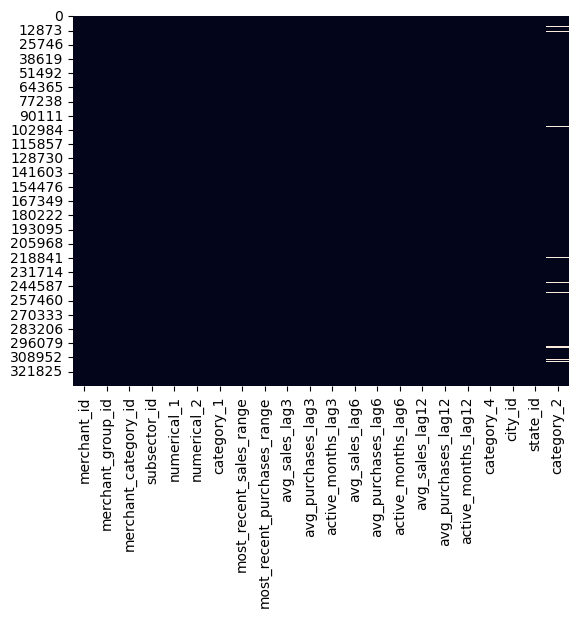

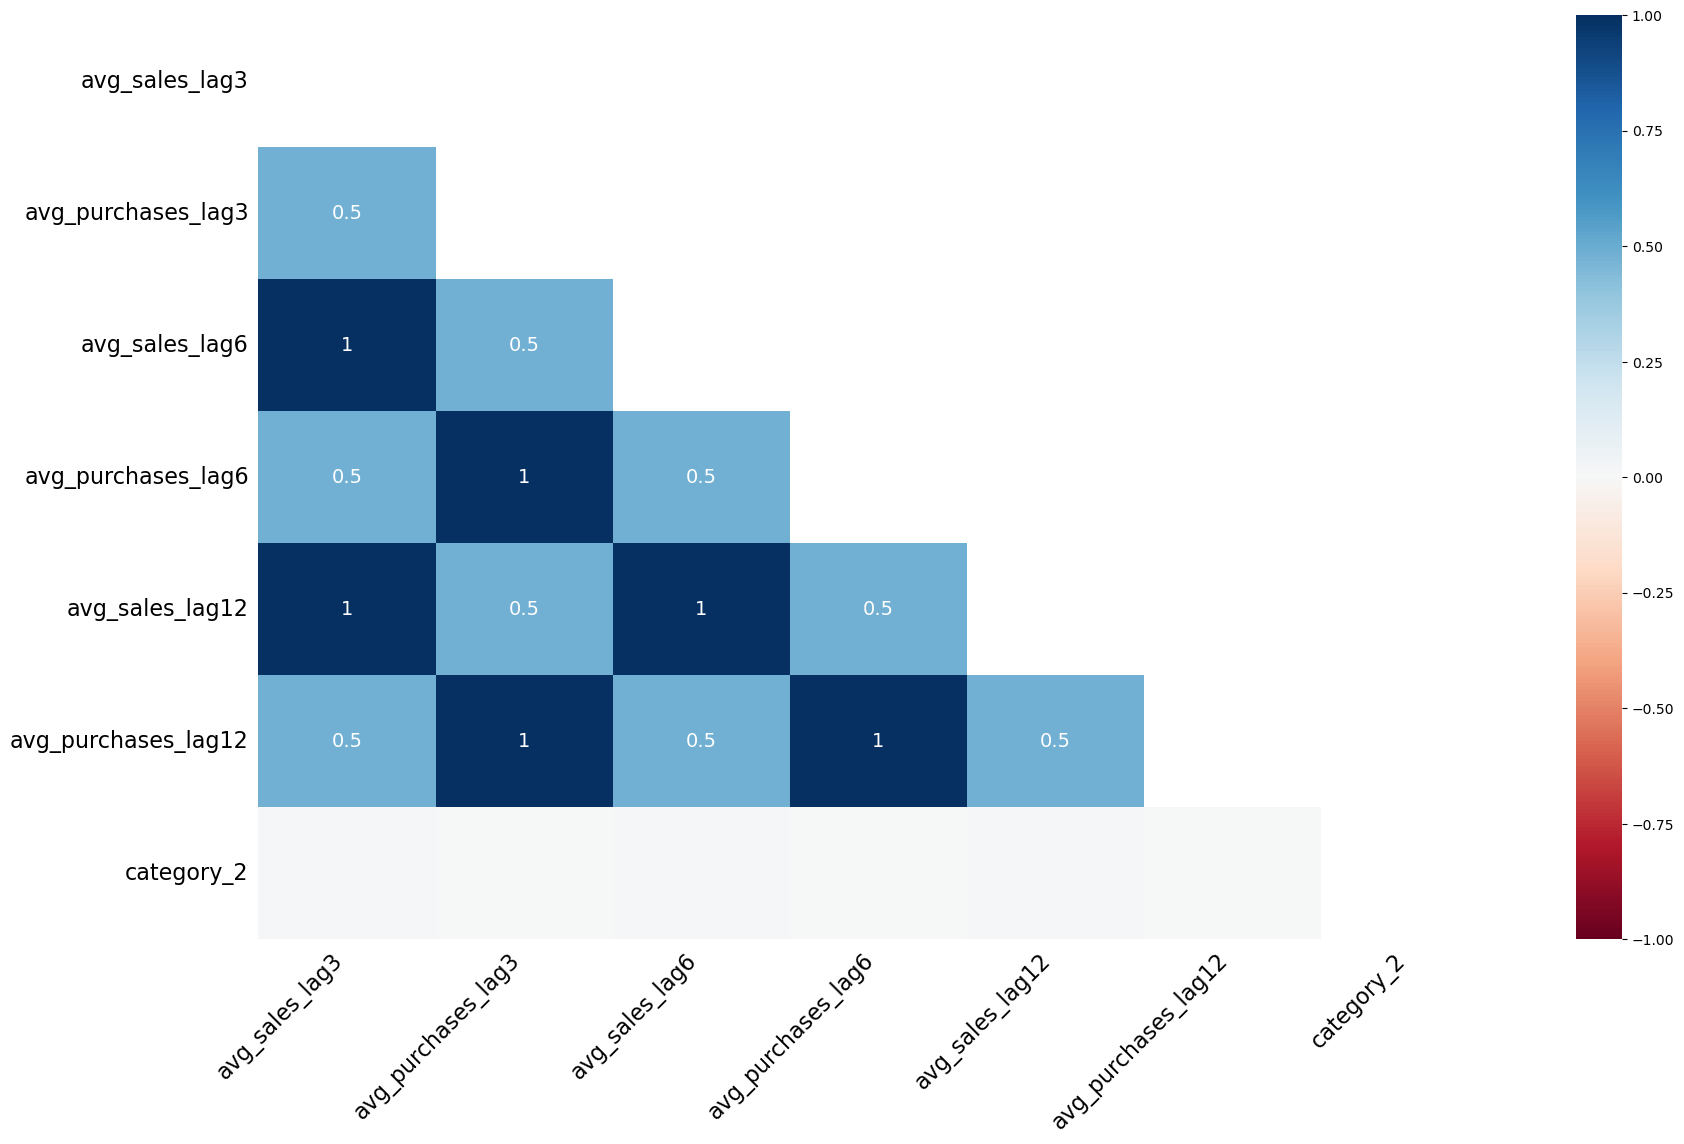

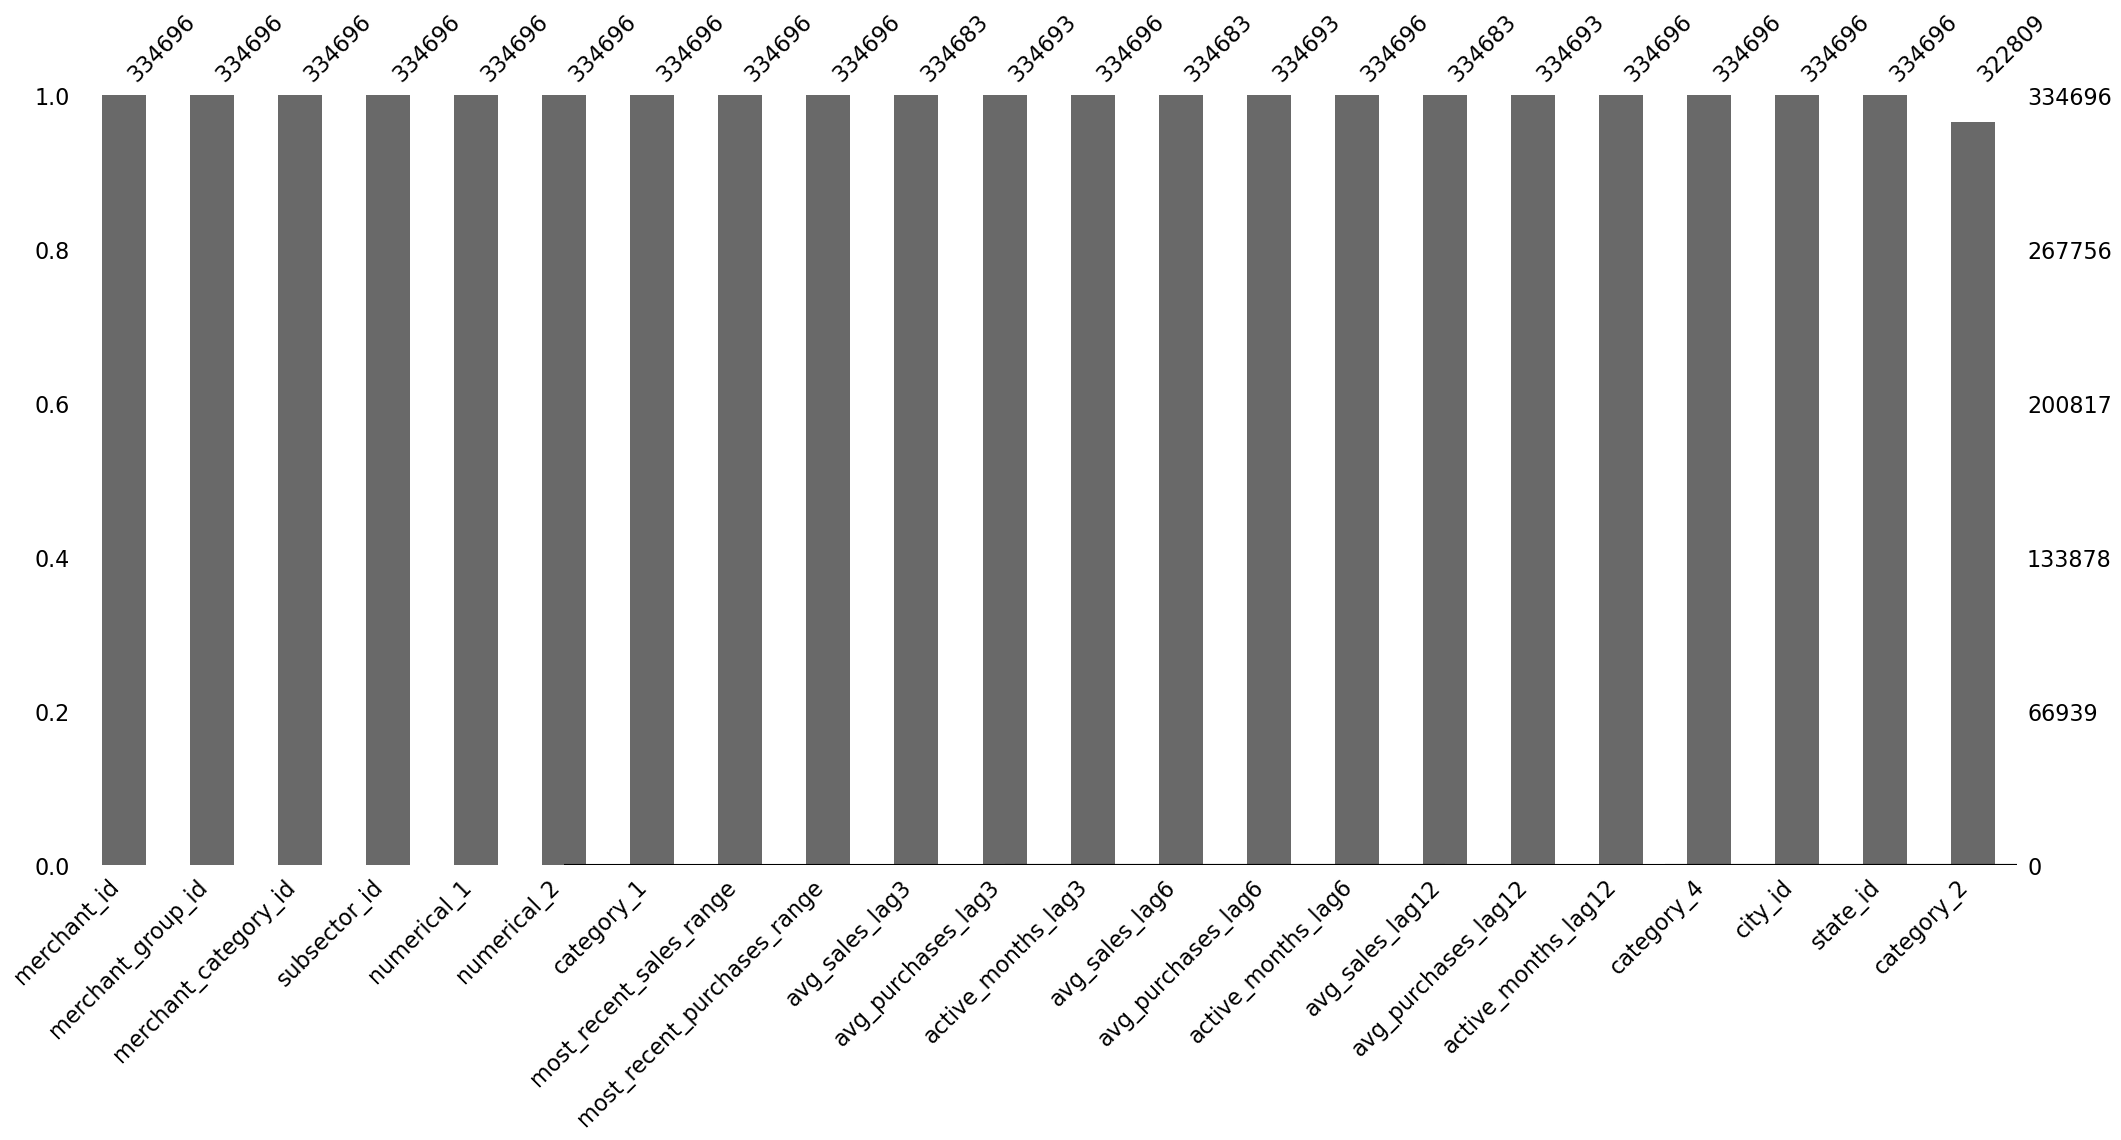

null_val  percent_null  zero_value  total_percent
category_2                      11887         3.552           0          3.552
avg_sales_lag6                     13         0.004           0          0.004
avg_sales_lag12                    13         0.004           0          0.004
avg_sales_lag3                     13         0.004           0          0.004
avg_purchases_lag12                 3         0.001           0          0.001
avg_purchases_lag3                  3         0.001           0          0.001
avg_purchases_lag6                  3         0.001           0          0.001
state_id                            0         0.000           0          0.000
city_id                             0         0.000           0          0.000
category_4                          0         0.000           0          0.000
active_months_lag12                 0         0.000           0          0.000
active_months_lag6                  0         0.000           0          0.000
merchant_id                         0         0.000           0          0.000
merchant_group_id                   0         0.000           0          0.000
most_recent_purchases_range         0         0.000           0          0.000
most_recent_sales_range             0         0.000           0          0.000
category_1                          0         0.000           0          0.000
numerical_2                         0         0.000           0          0.000
numerical_1                         0         0.000           0          0.000
subsector_id                        0         0.000           0          0.000
merchant_category_id                0         0.000           0          0.000
active_months_lag3                  0         0.000           0          0.000

In [ ]:
explore_merchant_df.null_values()


**Observation**
- The pattern of missing values in this dataset is 
    - MAR in avg_sales_lag6	,avg_sales_lag12 ,avg_sales_lag3 ,avg_purchases_lag12, avg_purchases_lag3 ,and avg_purchases_lag6 columns 
    - MCAR in category_2 column 
- The percent of missing isn't large 

I prefer handling this missing after merging all the data together 

### Distribution Of merchant Data
---------------

- #### Distribution of numerical features


array([[<AxesSubplot:title={'center':'merchant_group_id'}>,
        <AxesSubplot:title={'center':'merchant_category_id'}>,
        <AxesSubplot:title={'center':'subsector_id'}>,
        <AxesSubplot:title={'center':'numerical_1'}>],
       [<AxesSubplot:title={'center':'numerical_2'}>,
        <AxesSubplot:title={'center':'avg_sales_lag3'}>,
        <AxesSubplot:title={'center':'avg_purchases_lag3'}>,
        <AxesSubplot:title={'center':'active_months_lag3'}>],
       [<AxesSubplot:title={'center':'avg_sales_lag6'}>,
        <AxesSubplot:title={'center':'avg_purchases_lag6'}>,
        <AxesSubplot:title={'center':'active_months_lag6'}>,
        <AxesSubplot:title={'center':'avg_sales_lag12'}>],
       [<AxesSubplot:title={'center':'avg_purchases_lag12'}>,
        <AxesSubplot:title={'center':'active_months_lag12'}>,
        <AxesSubplot:title={'center':'city_id'}>,
        <AxesSubplot:title={'center':'state_id'}>],
       [<AxesSubplot:title={'center':'category_2'}>, <AxesSubplot:>,


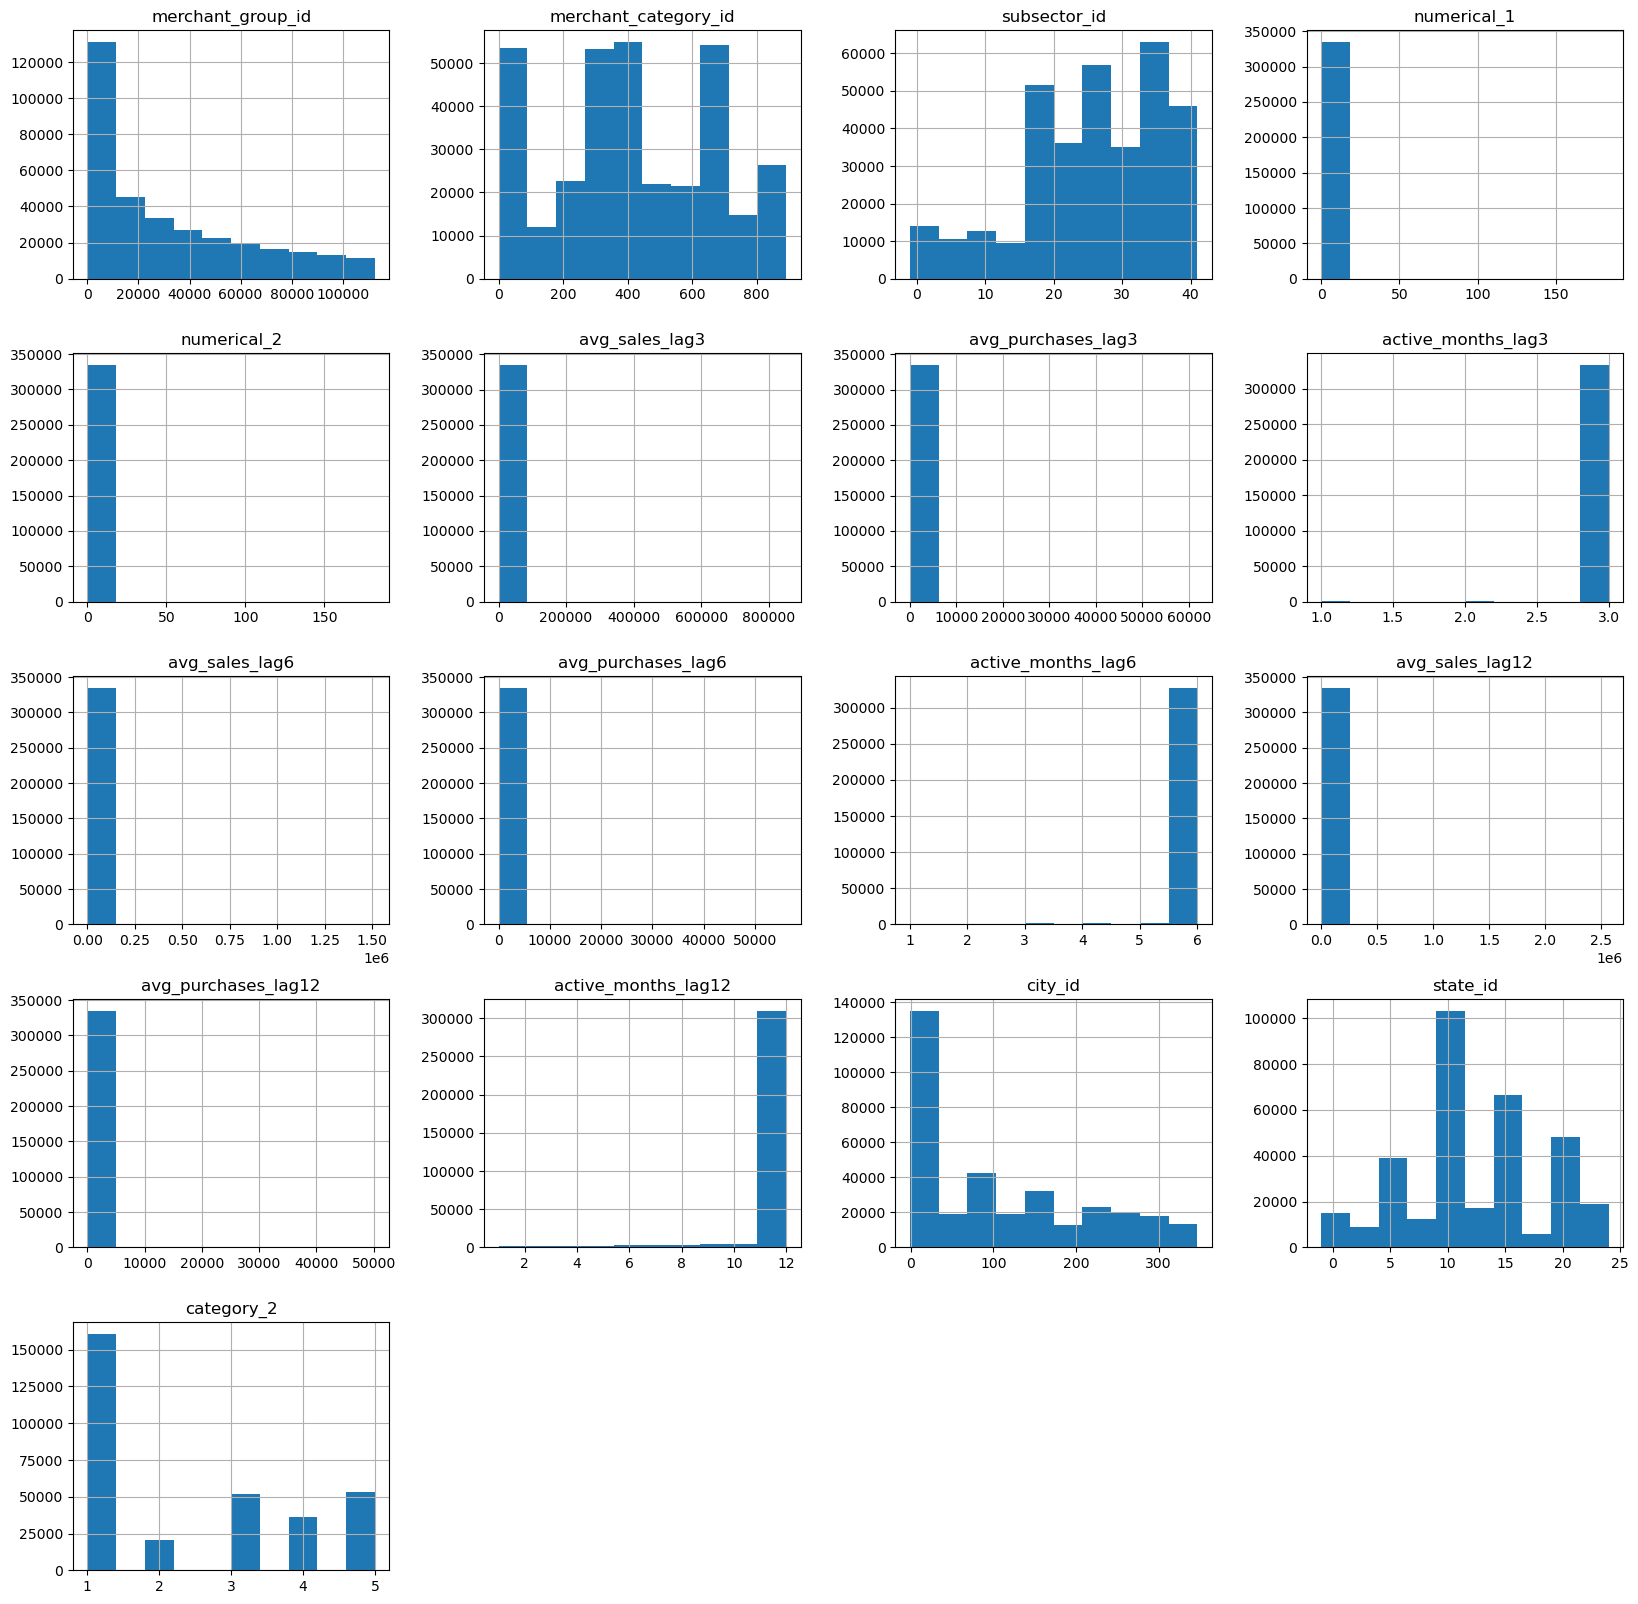

In [ ]:
merchants.hist(figsize=(20 , 20))
plt.show()

**Observation**
- Most of features are skewed distributed. So, we cann't use any model assume normal distribution e.g Linear regression.
- we will try to discover more details about our data help us in taking the decision if we can handle this skewness or choose model can deal with this data as it is

- #### Distribution of categorical features

N    0.978969
Y    0.021031
Name: category_1, dtype: float64


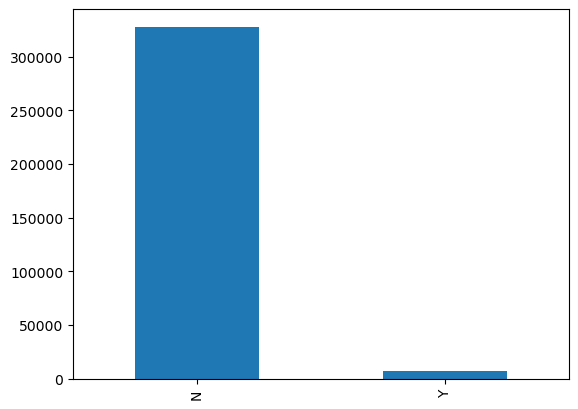


E    0.523786
D    0.356105
C    0.102015
B    0.015076
A    0.003018
Name: most_recent_purchases_range, dtype: float64


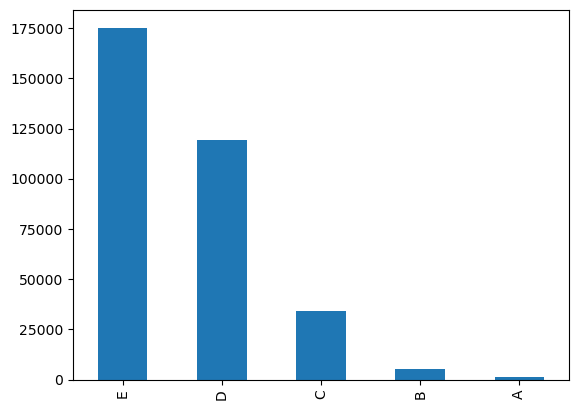


N    0.712874
Y    0.287126
Name: category_4, dtype: float64


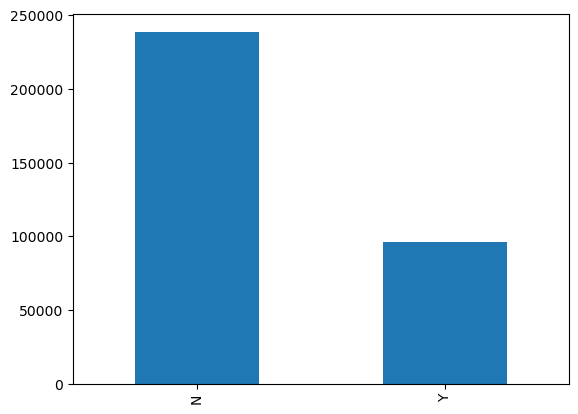


E    0.529149
D    0.350990
C    0.101809
B    0.015049
A    0.003003
Name: most_recent_sales_range, dtype: float64


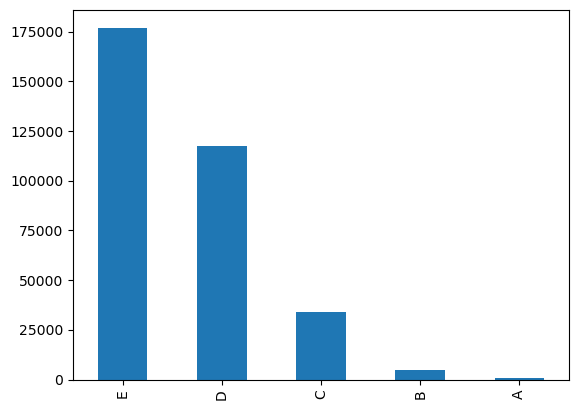

In [ ]:
col_excluded = ['merchant_id']
explore_merchant_df.plot_object_features(col_excluded)

**Observation**
- The categorical features isn't high cardinality Except mercants_id column. So, we cann't plot it here
- These features should be encoded. The model can deal with string. so, we encode thes features using label encoding or one hot encoding . we will do these after merging all datasets  together. 

### Visualize Outliers
-----------------

<Figure size 5000x2000 with 0 Axes>

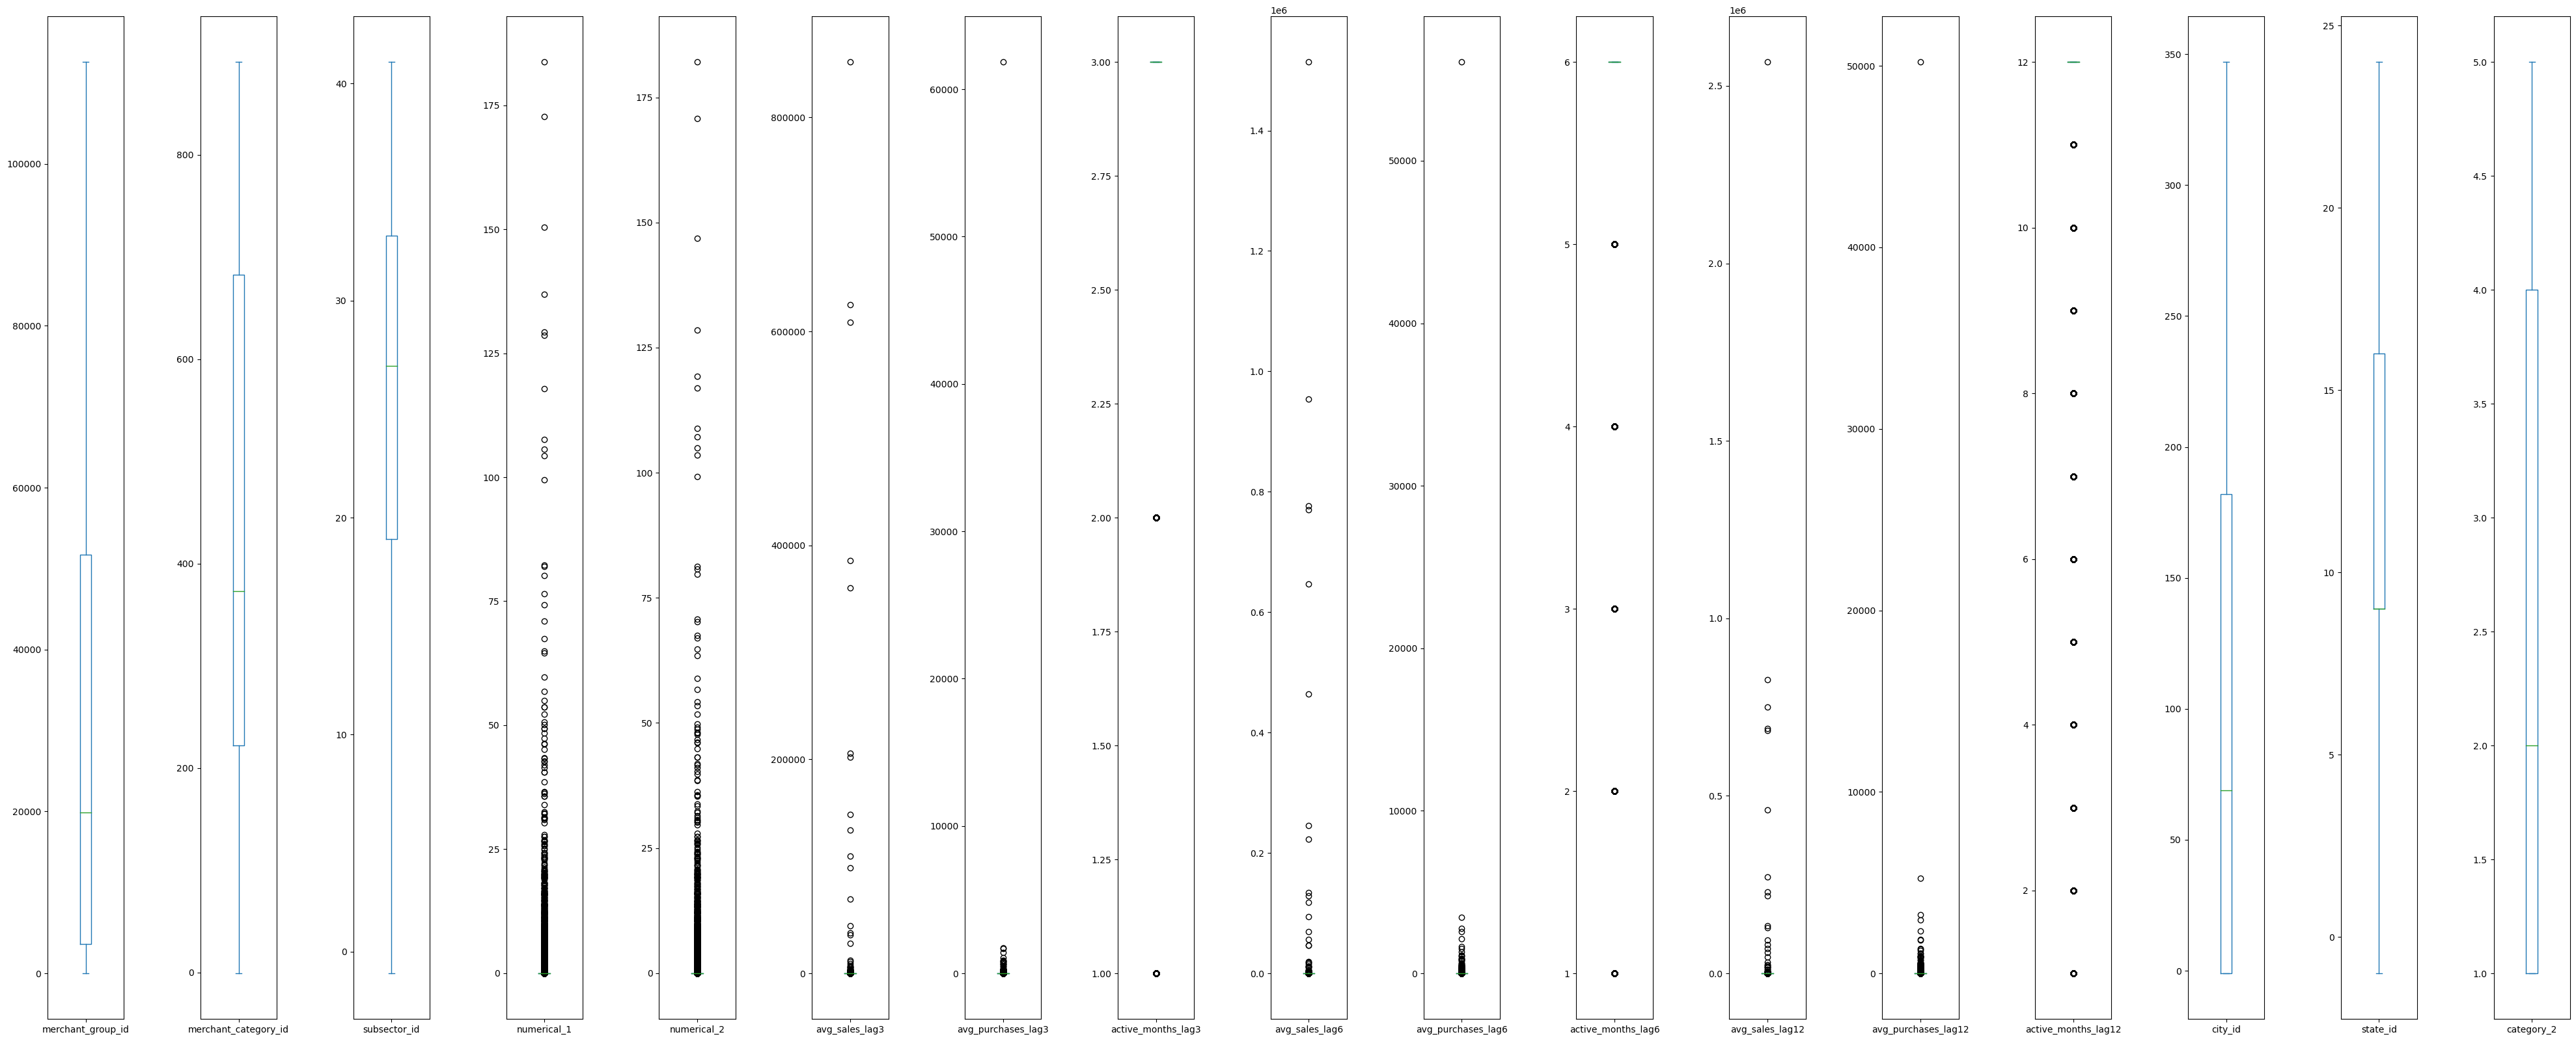

In [ ]:
explore_merchant_df.visualize_outlier()

**Observation**

- numerical_1 ,numerical_2, avg_sales_lag3 ,avg_sales_lag12, avg_sales_lag6,avg_purchase_lag6, avg_purchase_lag12 ,avg_purchase_lag3 and score are the most columns that have outliers

- we will solve these problem after merging all datasets

- ### Merge merchants file and all_transactions file together
----------------

In [ ]:
common_column = set(all_transactions.columns.tolist()) & set(merchants.columns.tolist())
merged_merchant_transactions = pd.merge(all_transactions, merchants, on= list(common_column), how = "inner")
print("Shape of merged data " , merged_merchant_transactions.shape)

Shape of merged data  (16466160, 29)


In [ ]:
merged_merchant_transactions.to_csv("merged_merchant_transactions.csv" , index = False)# Save merged dataframe  as csv 

- ### Merge merged_merchant_transactions to user score file 
----------------

In [ ]:
final_merged_data = pd.merge(merged_merchant_transactions, user_score, on= 'card_id', how = "inner")
print("Shape of data after merging all files" , final_merged_data.shape)

Shape of data after merging all files (10204592, 34)


In [ ]:
final_merged_data.to_csv("final_merged_data.csv" , index = False)# Save file merged dataframe  as csv (merge 4 files together)

# Summary of Question 1 :

- We Used 2 different notebooks:
  - In first notebook, 
    - we Concat 2 files( new_merchant_transactions and historical_transactions. We merged the 2 datasets using outer join based on common columns(EQUALS TO CONCAT). 
    - we applied some of analysis before merging.Then we merged the 2 datasets and partially clean it.

  - In this notebook, 
    - we continued our work and merge the merged data ( resulted from the first notebook) to merchants using inner join based on common columns between two files. Then merge the result to user_score using inner join based on card_id.
    - Actually, we analyzed merchant file berfore merging and found a lot of problem as we mentioned above. But, we perfer to solve thes problems after merging all files together. Only, we replace all inf values in merchant file with nan before merging. 

Surely, the merge doesn't solve the above problems and we will see these problem in the final merged file.
Don't worry, we will do our best to get the better performance 

# <span style="color: Blue;"> Q2 (20 points) Discuss the quality of the dataset, considering missing values, missing value patterns, missing value mechanism, and noise (e.g., consistency). Note, you do not need to discuss each attribute in each table. Focus on the ones you believe are the most important for user (card) loyalty analysis and prediction</span>
- As we mentined in the previous section, merchant file has inf values . we replace them with nan. 
- The Data have null values in the following columns avg_sales_lag12 , avg_sales_lag6 and avg_sales_lag3 
  - The pattern of missing in these columns are MAR. The heatmap shows that there is high correllation between each other.
  - We will drop these null values as they only one value missing in each column. So, we see that it is better to drop them
  - The mechanism is General 

- The Data have some Inconsistency such as installments column have -1 and 999 as value. Surely, they are noise. If you remember we handle this problem in the first notebook 

- Score , avg_sales_lag3 ,and numerical_1 Columns have some values are outlier. Actually, it may be a true value. I don't know the domain knowlegde about this. So, I tried to handle them and not to handle them. I noticed that removing outlier improve mean square error but it reduce the r square compared to not removing outliers. It refers that our assumption is true.



- ['numerical_2', 'avg_purchases_lag3', 'avg_sales_lag6', 'avg_purchases_lag6', 'avg_sales_lag12', 'avg_purchases_lag12' , 'category_1'] are redundant features.we will drop thes features later

- Category_1 is a constant features doesn't effect. So, we will drop this features in the next section

- The data isn't normally distributed. It is skewed distributed.So, we will not choose linear regression model

- There are categorical features. we will encode them 


# Explore Final Merged Data
--------------
-------------
------------

In [4]:
final_merged_data = read.read_csv('final_merged_data.csv')

Mem. usage decreased to 1381.92 Mb (47.8% reduction)


In [5]:
explore_final_merged_data = Explore_Data(final_merged_data)

- ## Describe and summarize data
------------------------

In [ ]:
explore_final_merged_data.summary()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10204592 entries, 0 to 10204591
Data columns (total 34 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   authorized_flag              object 
 1   card_id                      object 
 2   city_id                      int16  
 3   category_1                   object 
 4   installments                 int8   
 5   category_3                   object 
 6   merchant_category_id         int16  
 7   merchant_id                  object 
 8   month_lag                    int8   
 9   purchase_amount              float32
 10  purchase_date                object 
 11  category_2                   float32
 12  state_id                     int8   
 13  subsector_id                 int8   
 14  merchant_group_id            int32  
 15  numerical_1                  float32
 16  numerical_2                  float32
 17  most_recent_sales_range      object 
 18  most_recent_purchases_range  object 
 19

authorized_flag          card_id       city_id category_1  \
count         10204592         10204592  1.020459e+07   10204592   
unique               2           179589           NaN          1   
top                  Y  C_ID_0cd2ce025c           NaN          N   
freq           9603943             2530           NaN   10204592   
mean               NaN              NaN  1.353347e+02        NaN   
std                NaN              NaN  9.176562e+01        NaN   
min                NaN              NaN  1.000000e+00        NaN   
25%                NaN              NaN  6.900000e+01        NaN   
50%                NaN              NaN  1.240000e+02        NaN   
75%                NaN              NaN  2.110000e+02        NaN   
max                NaN              NaN  3.470000e+02        NaN   

        installments category_3  merchant_category_id      merchant_id  \
count   1.020459e+07   10204592          1.020459e+07         10204592   
unique           NaN          3                   NaN           187089   
top              NaN          A                   NaN  M_ID_5ba019a379   
freq             NaN    6051641                   NaN            94510   
mean    4.221160e-01        NaN          4.417053e+02              NaN   
std     5.236683e-01        NaN          2.363109e+02              NaN   
min     0.000000e+00        NaN          2.000000e+00              NaN   
25%     0.000000e+00        NaN          2.780000e+02              NaN   
50%     0.000000e+00        NaN          3.870000e+02              NaN   
75%     1.000000e+00        NaN          7.050000e+02              NaN   
max     2.000000e+00        NaN          8.910000e+02              NaN   

           month_lag  purchase_amount        purchase_date    category_2  \
count   1.020459e+07     1.020459e+07             10204592  1.020459e+07   
unique           NaN              NaN              8084503           NaN   
top              NaN              NaN  2017-11-25 00:00:00           NaN   
freq             NaN              NaN                 9719           NaN   
mean   -6.171096e+00    -1.102786e+00                  NaN  2.062123e+00   
std     3.787365e+00     1.922908e-01                  NaN  1.544330e+00   
min    -1.500000e+01    -1.374001e+00                  NaN  1.000000e+00   
25%    -9.000000e+00    -1.283469e+00                  NaN  1.000000e+00   
50%    -5.000000e+00    -1.200057e+00                  NaN  1.000000e+00   
75%    -3.000000e+00    -1.043365e+00                  NaN  3.000000e+00   
max     0.000000e+00    -5.487354e-01                  NaN  5.000000e+00   

            state_id  subsector_id  merchant_group_id   numerical_1  \
count   1.020459e+07  1.020459e+07       1.020459e+07  1.020459e+07   
unique           NaN           NaN                NaN           NaN   
top              NaN           NaN                NaN           NaN   
freq             NaN           NaN                NaN           NaN   
mean    1.196614e+01  2.818224e+01       2.385103e+04  5.063391e+00   
std     5.447555e+00  9.287169e+00       3.146898e+04  2.164915e+01   
min     1.000000e+00  1.000000e+00       1.000000e+00 -5.747065e-02   
25%     9.000000e+00  1.900000e+01       3.500000e+01 -5.747065e-02   
50%     9.000000e+00  3.300000e+01       6.642000e+03 -2.772594e-02   
75%     1.600000e+01  3.400000e+01       4.101500e+04  4.680193e-01   
max     2.400000e+01  4.100000e+01       1.125840e+05  1.727197e+02   

         numerical_2 most_recent_sales_range most_recent_purchases_range  \
count   1.020459e+07                10204592                    10204592   
unique           NaN                       5                           5   
top              NaN                       C                           C   
freq             NaN                 2892130                     2936213   
mean    4.927972e+00                     NaN                         NaN   
std     2.128233e+01                     NaN                         NaN   
min

**Observation**
- The merchants data contain different datatypes such as int, float and object 
- There is about 10 objects features : 2 features (first_active_month , purchase_date ) are datetime and  8 categrical features 


- ## Check Null values
------------------------


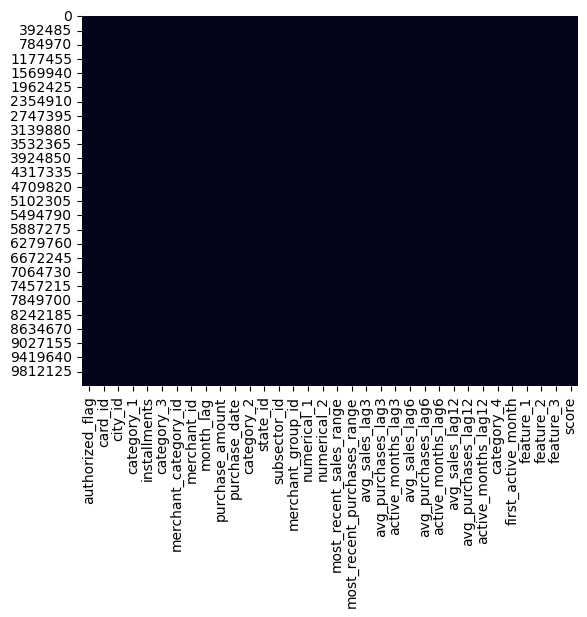

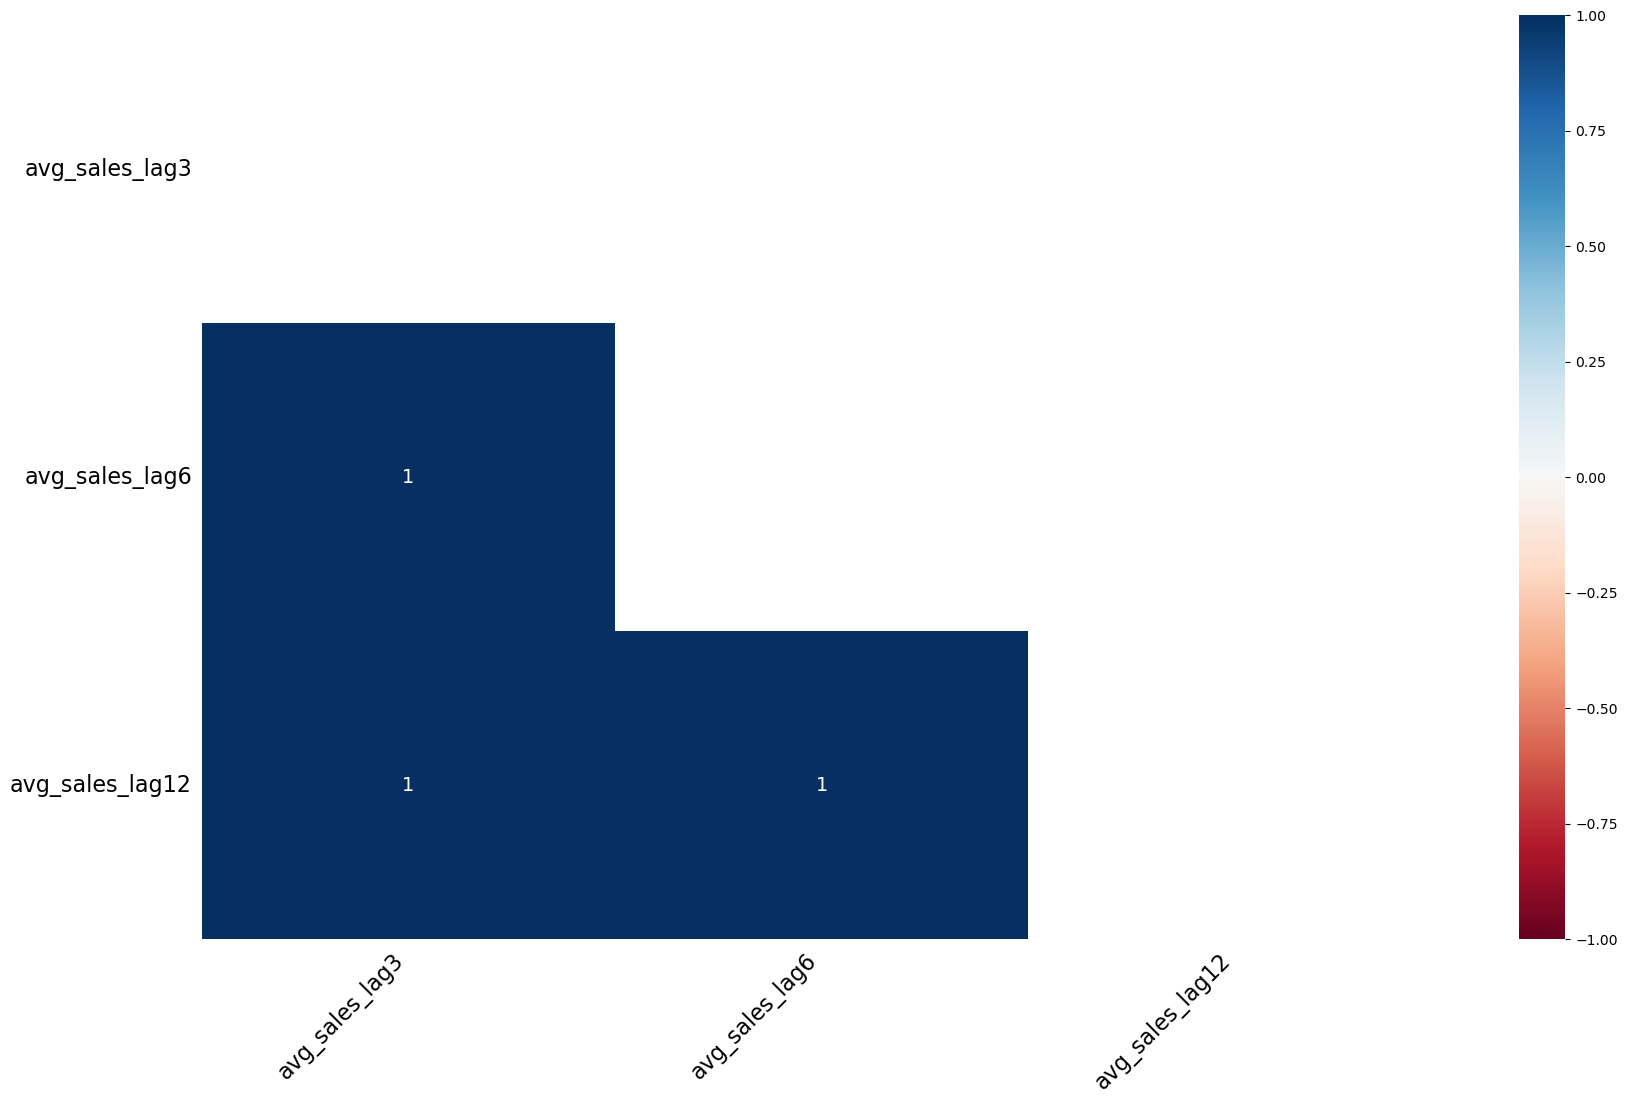

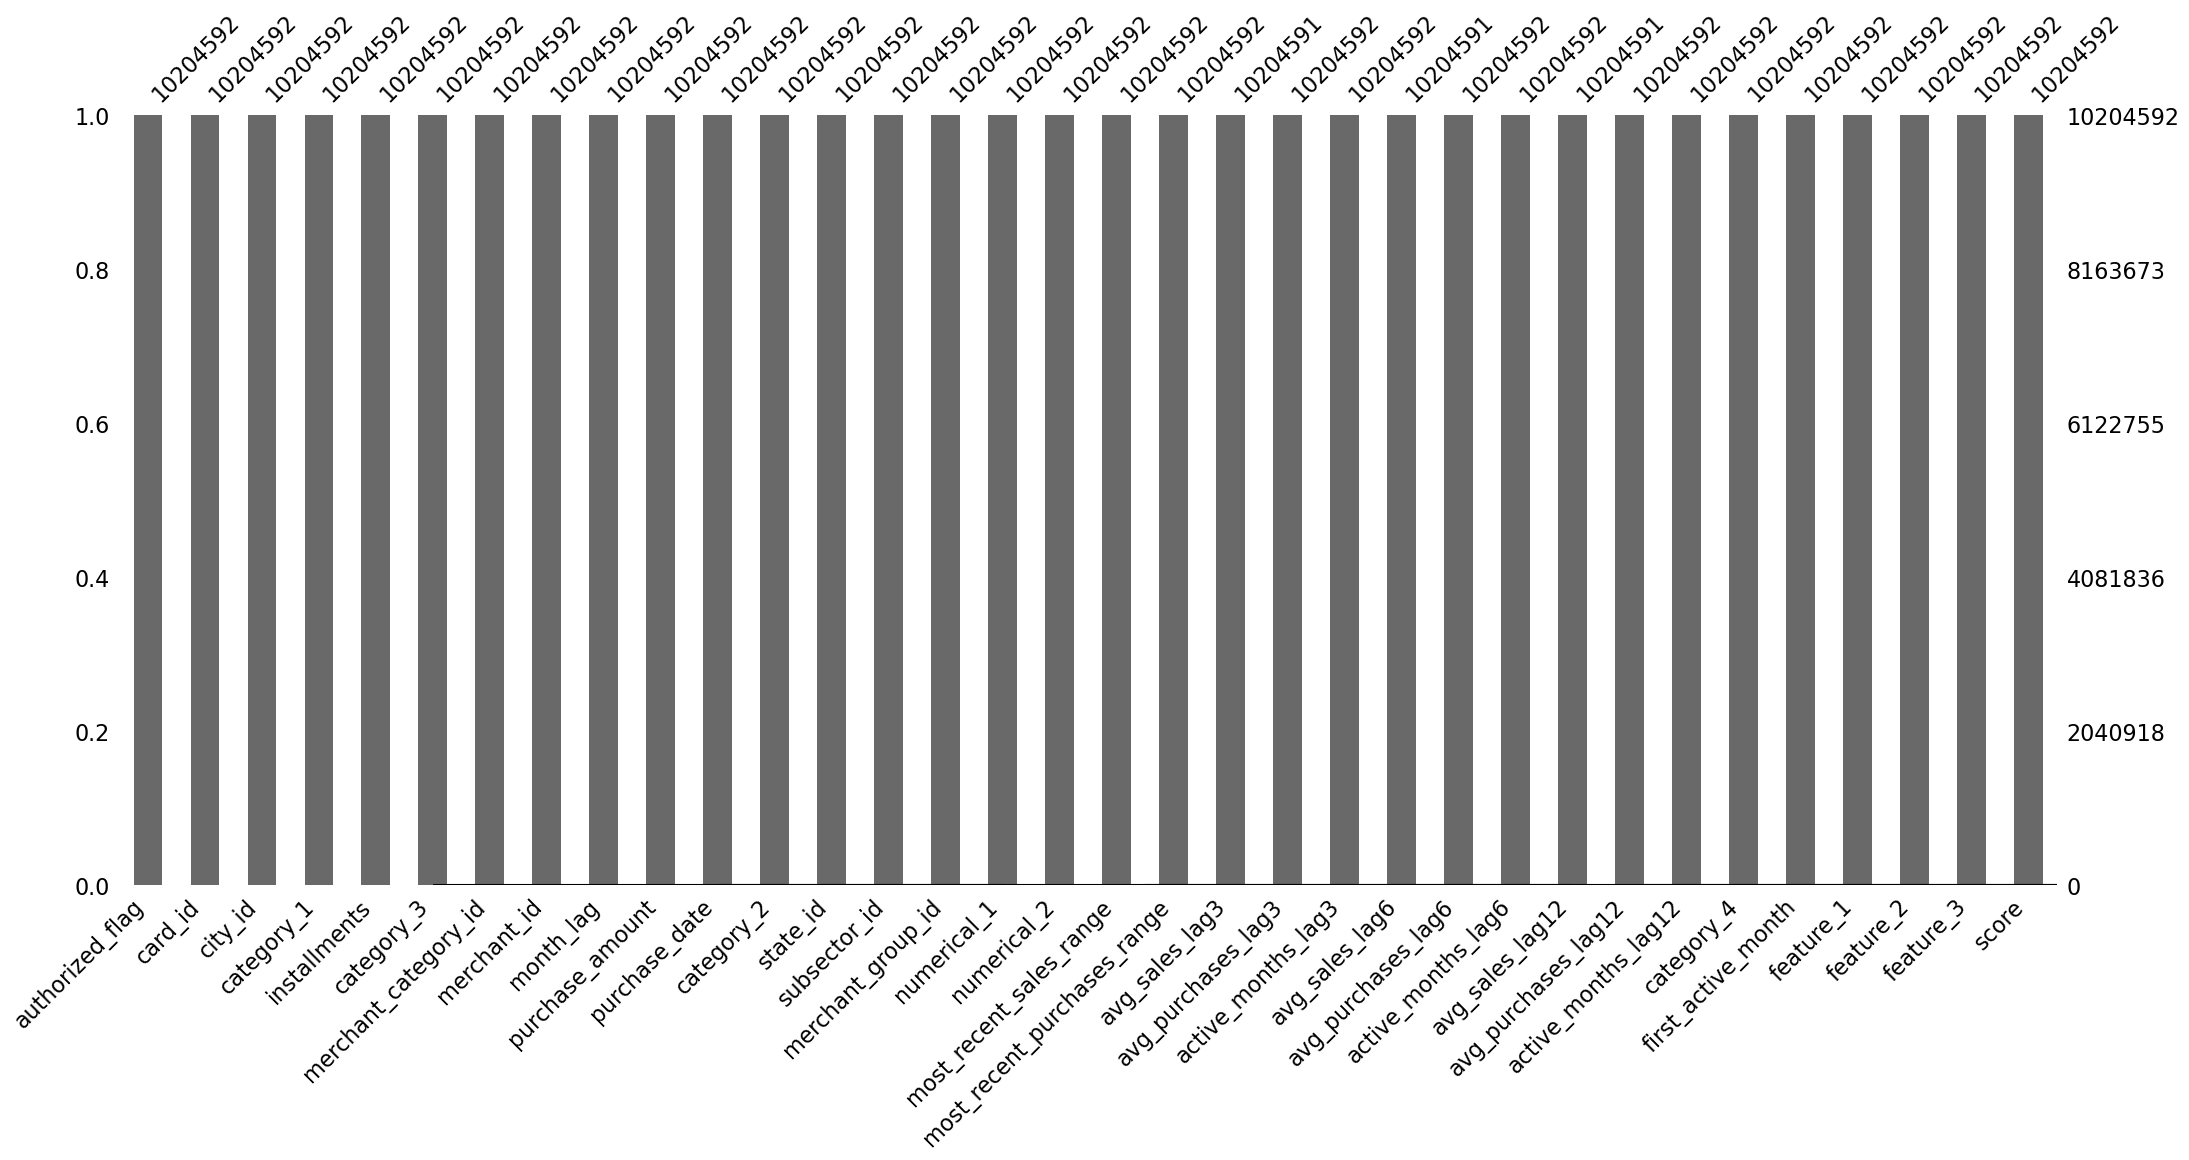

null_val  percent_null  zero_value  total_percent
avg_sales_lag12                     1           0.0           0          0.000
avg_sales_lag3                      1           0.0           0          0.000
avg_sales_lag6                      1           0.0           0          0.000
authorized_flag                     0           0.0           0          0.000
avg_purchases_lag3                  0           0.0           0          0.000
active_months_lag3                  0           0.0           0          0.000
avg_purchases_lag6                  0           0.0           0          0.000
active_months_lag6                  0           0.0           0          0.000
avg_purchases_lag12                 0           0.0           0          0.000
card_id                             0           0.0           0          0.000
active_months_lag12                 0           0.0           0          0.000
category_4                          0           0.0           0          0.000
first_active_month                  0           0.0           0          0.000
feature_1                           0           0.0           0          0.000
feature_2                           0           0.0           0          0.000
feature_3                           0           0.0     4466002         43.765
most_recent_purchases_range         0           0.0           0          0.000
most_recent_sales_range             0           0.0           0          0.000
numerical_2                         0           0.0           0          0.000
numerical_1                         0           0.0           0          0.000
merchant_group_id                   0           0.0           0          0.000
subsector_id                        0           0.0           0          0.000
state_id                            0           0.0           0          0.000
category_2                          0           0.0           0          0.000
purchase_date                       0           0.0           0          0.000
purchase_amount                     0           0.0           0          0.000
month_lag                           0           0.0      319118          3.127
merchant_id                         0           0.0           0          0.000
merchant_category_id                0           0.0           0          0.000
category_3                          0           0.0           0          0.000
installments                        0           0.0     6051641         59.303
category_1                          0           0.0           0          0.000
city_id                             0           0.0           0          0.000
score                               0           0.0       14951          0.147

In [ ]:
explore_final_merged_data.null_values()


- ## Check Duplication values

In [ ]:
explore_final_merged_data.duplicated_values()


Number of duplicated rows 0


- ## Check Constant Features
----------------


In [ ]:
explore_final_merged_data.constant_columns()


[['category_1',
  N    10204592
  Name: category_1, dtype: int64]]

- ## Check correlation
------------------

## Q7 (10 Points) Detect if multicollinearity exists in selected features (used in Q6).

['numerical_2', 'avg_purchases_lag3', 'avg_sales_lag6', 'avg_purchases_lag6', 'avg_sales_lag12', 'avg_purchases_lag12'] are highly correlated to each other. They are redundant features. So, we can drop them in the next section

In [ ]:
explore_final_merged_data.redundant_features()


['numerical_2', 'avg_purchases_lag3', 'avg_sales_lag6', 'avg_purchases_lag6', 'avg_sales_lag12', 'avg_purchases_lag12']


city_id  installments  merchant_category_id  month_lag  \
city_id                   NaN      0.009664              0.031705   0.005781   
installments              NaN           NaN              0.019692   0.056091   
merchant_category_id      NaN           NaN                   NaN   0.013194   
month_lag                 NaN           NaN                   NaN        NaN   
purchase_amount           NaN           NaN                   NaN        NaN   
category_2                NaN           NaN                   NaN        NaN   
state_id                  NaN           NaN                   NaN        NaN   
subsector_id              NaN           NaN                   NaN        NaN   
merchant_group_id         NaN           NaN                   NaN        NaN   
numerical_1               NaN           NaN                   NaN        NaN   
numerical_2               NaN           NaN                   NaN        NaN   
avg_sales_lag3            NaN           NaN                   NaN        NaN   
avg_purchases_lag3        NaN           NaN                   NaN        NaN   
active_months_lag3        NaN           NaN                   NaN        NaN   
avg_sales_lag6            NaN           NaN                   NaN        NaN   
avg_purchases_lag6        NaN           NaN                   NaN        NaN   
active_months_lag6        NaN           NaN                   NaN        NaN   
avg_sales_lag12           NaN           NaN                   NaN        NaN   
avg_purchases_lag12       NaN           NaN                   NaN        NaN   
active_months_lag12       NaN           NaN                   NaN        NaN   
feature_1                 NaN           NaN                   NaN        NaN   
feature_2                 NaN           NaN                   NaN        NaN   
feature_3                 NaN           NaN                   NaN        NaN   
score                     NaN           NaN                   NaN        NaN   

                      purchase_amount  category_2  state_id  subsector_id  \
city_id                      0.015786    0.031884  0.129566      0.028340   
installments                 0.211635    0.001761  0.017963      0.024253   
merchant_category_id         0.017804    0.001708  0.002578      0.007599   
month_lag                    0.006119    0.001675  0.010658      0.017461   
purchase_amount                   NaN    0.016954  0.013743      0.184342   
category_2                        NaN         NaN  0.189166      0.008202   
state_id                          NaN         NaN       NaN      0.005568   
subsector_id                      NaN         NaN       NaN           NaN   
merchant_group_id                 NaN         NaN       NaN           NaN   
numerical_1                       NaN         NaN       NaN           NaN   
numerical_2                       NaN         NaN       NaN           NaN   
avg_sales_lag3                    NaN         NaN       NaN           NaN   
avg_purchases_lag3                NaN         NaN       NaN           NaN   
active_months_lag3                NaN         NaN       NaN           NaN   
avg_sales_lag6                    NaN         NaN       NaN           NaN   
avg_purchases_lag6                NaN         NaN       NaN           NaN   
active_months_lag6                NaN         NaN       NaN           NaN   
avg_sales_lag12                   NaN         NaN       NaN           NaN   
avg_purchases_lag12               NaN         NaN       NaN           NaN   
active_months_lag12               NaN         NaN       NaN           NaN   
feature_1                         NaN         NaN       NaN           NaN   
feature_2                         NaN         NaN       NaN           NaN   
feature_3                         NaN         NaN       NaN           NaN   
score                             NaN         NaN       NaN           NaN   

                      merchant_group_id  numerical_1  numerical_2  \
city_id                   

## Q4 (10 points) Report important statistics in preprocessed data created in Q3. The target user loyalty score must be covered in the statistical analysis.

- we performed some statistical techniques such as normality test in the next section 
  - H0 : The data follow normal distribution
  - H1 : The data  doesn't follow normal distribution
  - After applying , the test and visualize data. we can conclude that we will reject null hypothesis and know that the data doesn't follow normal distribution
- Here, we calculated the correlation between score and all fetaures 

  - The most features that are correlated to score are :

    - month_lag ( negative correlated : -0.022784 )
    - installments (  negative correlated :  -0.027556)
    - category_2 (positive correlated  : 0.006164 )
    - city_id  (positive correlated  : 0.004117 )
    - merchant_category_id (positive correlated :   0.002121)


  - In the next section, we performed outlier visualization on score and other columns . We noticed that there is some of points are far from data. we can assume that they are noise or not based on our knowledge of domain. we tried the both as I mentioned before.

In [ ]:
final_merged_data.corrwith(final_merged_data['score']).sort_values(ascending =False)

score                   1.000000
category_2              0.006164
city_id                 0.004117
merchant_category_id    0.002121
feature_3               0.001761
active_months_lag6      0.001415
active_months_lag3      0.000468
purchase_amount        -0.000595
subsector_id           -0.000644
merchant_group_id      -0.001146
active_months_lag12    -0.001411
avg_sales_lag12        -0.001751
avg_sales_lag6         -0.001776
avg_purchases_lag12    -0.001786
avg_purchases_lag6     -0.001797
avg_sales_lag3         -0.001803
avg_purchases_lag3     -0.001815
numerical_1            -0.002926
numerical_2            -0.002926
feature_1              -0.003754
state_id               -0.004813
feature_2              -0.005622
month_lag              -0.022784
installments           -0.027556
dtype: float64

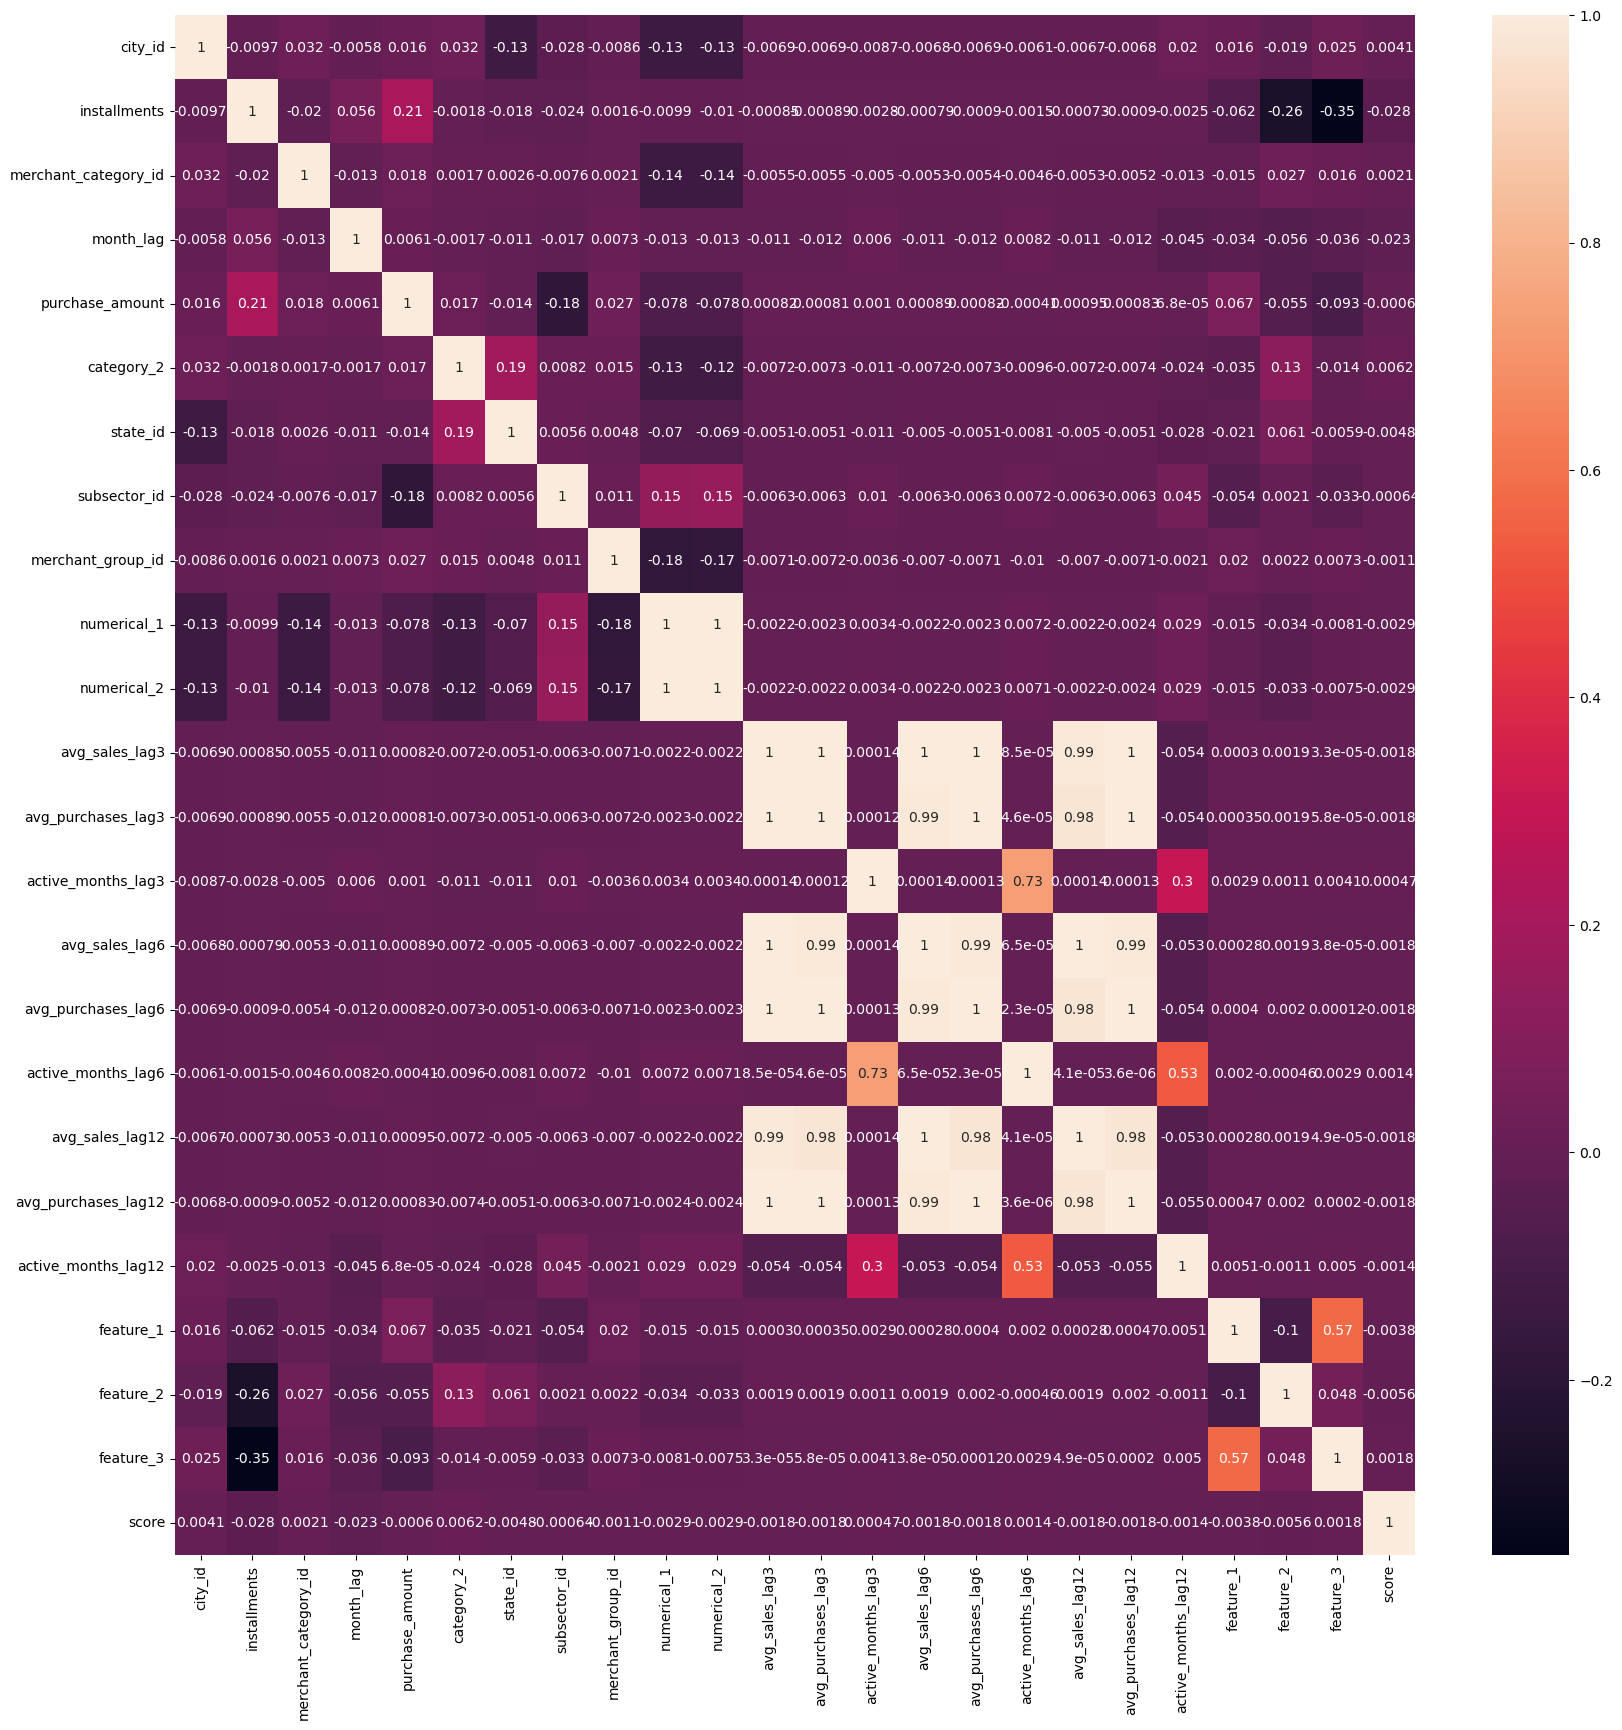

In [ ]:
explore_final_merged_data.visualize_correlation()

- ## Check cardinality 
-----------------------

In [ ]:
explore_final_merged_data.cardinality()


unique_val  percent_
purchase_date                   8084503      79.0
score                            176401       2.0
merchant_id                      187089       2.0
card_id                          179589       2.0
merchant_group_id                 74704       1.0
avg_purchases_lag6               100599       1.0
avg_purchases_lag12              123942       1.0
avg_purchases_lag3                77215       1.0
category_4                            2       0.0
active_months_lag12                  12       0.0
avg_sales_lag3                     2247       0.0
first_active_month                   74       0.0
avg_sales_lag12                    3425       0.0
active_months_lag6                    6       0.0
feature_1                             5       0.0
feature_2                             3       0.0
avg_sales_lag6                     3010       0.0
active_months_lag3                    3       0.0
feature_3                             2       0.0
authorized_flag                       2       0.0
most_recent_purchases_range           5       0.0
numerical_2                         661       0.0
numerical_1                         659       0.0
subsector_id                         40       0.0
state_id                             23       0.0
category_2                            5       0.0
purchase_amount                   21602       0.0
month_lag                            16       0.0
merchant_category_id                305       0.0
category_3                            3       0.0
installments                          3       0.0
category_1                            1       0.0
city_id                             270       0.0
most_recent_sales_range               5       0.0

## Visualize Outliers
--------------------------

## Q4 (10 points) Report important statistics in preprocessed data createdin Q3. The target user loyalty score must be covered in the statistical analysis.

- we performed some statistical techniques such as normality test in the next section 
  - H0 : The data follow normal distribution
  - H1 : The data  doesn't follow normal distribution
  - After applying , the test and visualize data. we can conclude that we will reject null hypothesis and know that the data doesn't follow normal distribution
- In the previous section, we calculated the correlation between score and all fetaures 

  - The most features that are correlated to score are :

    - month_lag ( negative correlated : -0.022784 )
    - installments (  negative correlated :  -0.027556)
    - category_2 (positive correlated  : 0.006164 )
    - city_id  (positive correlated  : 0.004117 )
    - merchant_category_id (positive correlated :   0.002121)


  - here, we performed outlier visualization on score and other columns . We noticed that there is some of points are far from data. we can assume that they are noise or not based on our knowledge of domain. we tried the both as I mentioned before.

<Figure size 5000x2000 with 0 Axes>

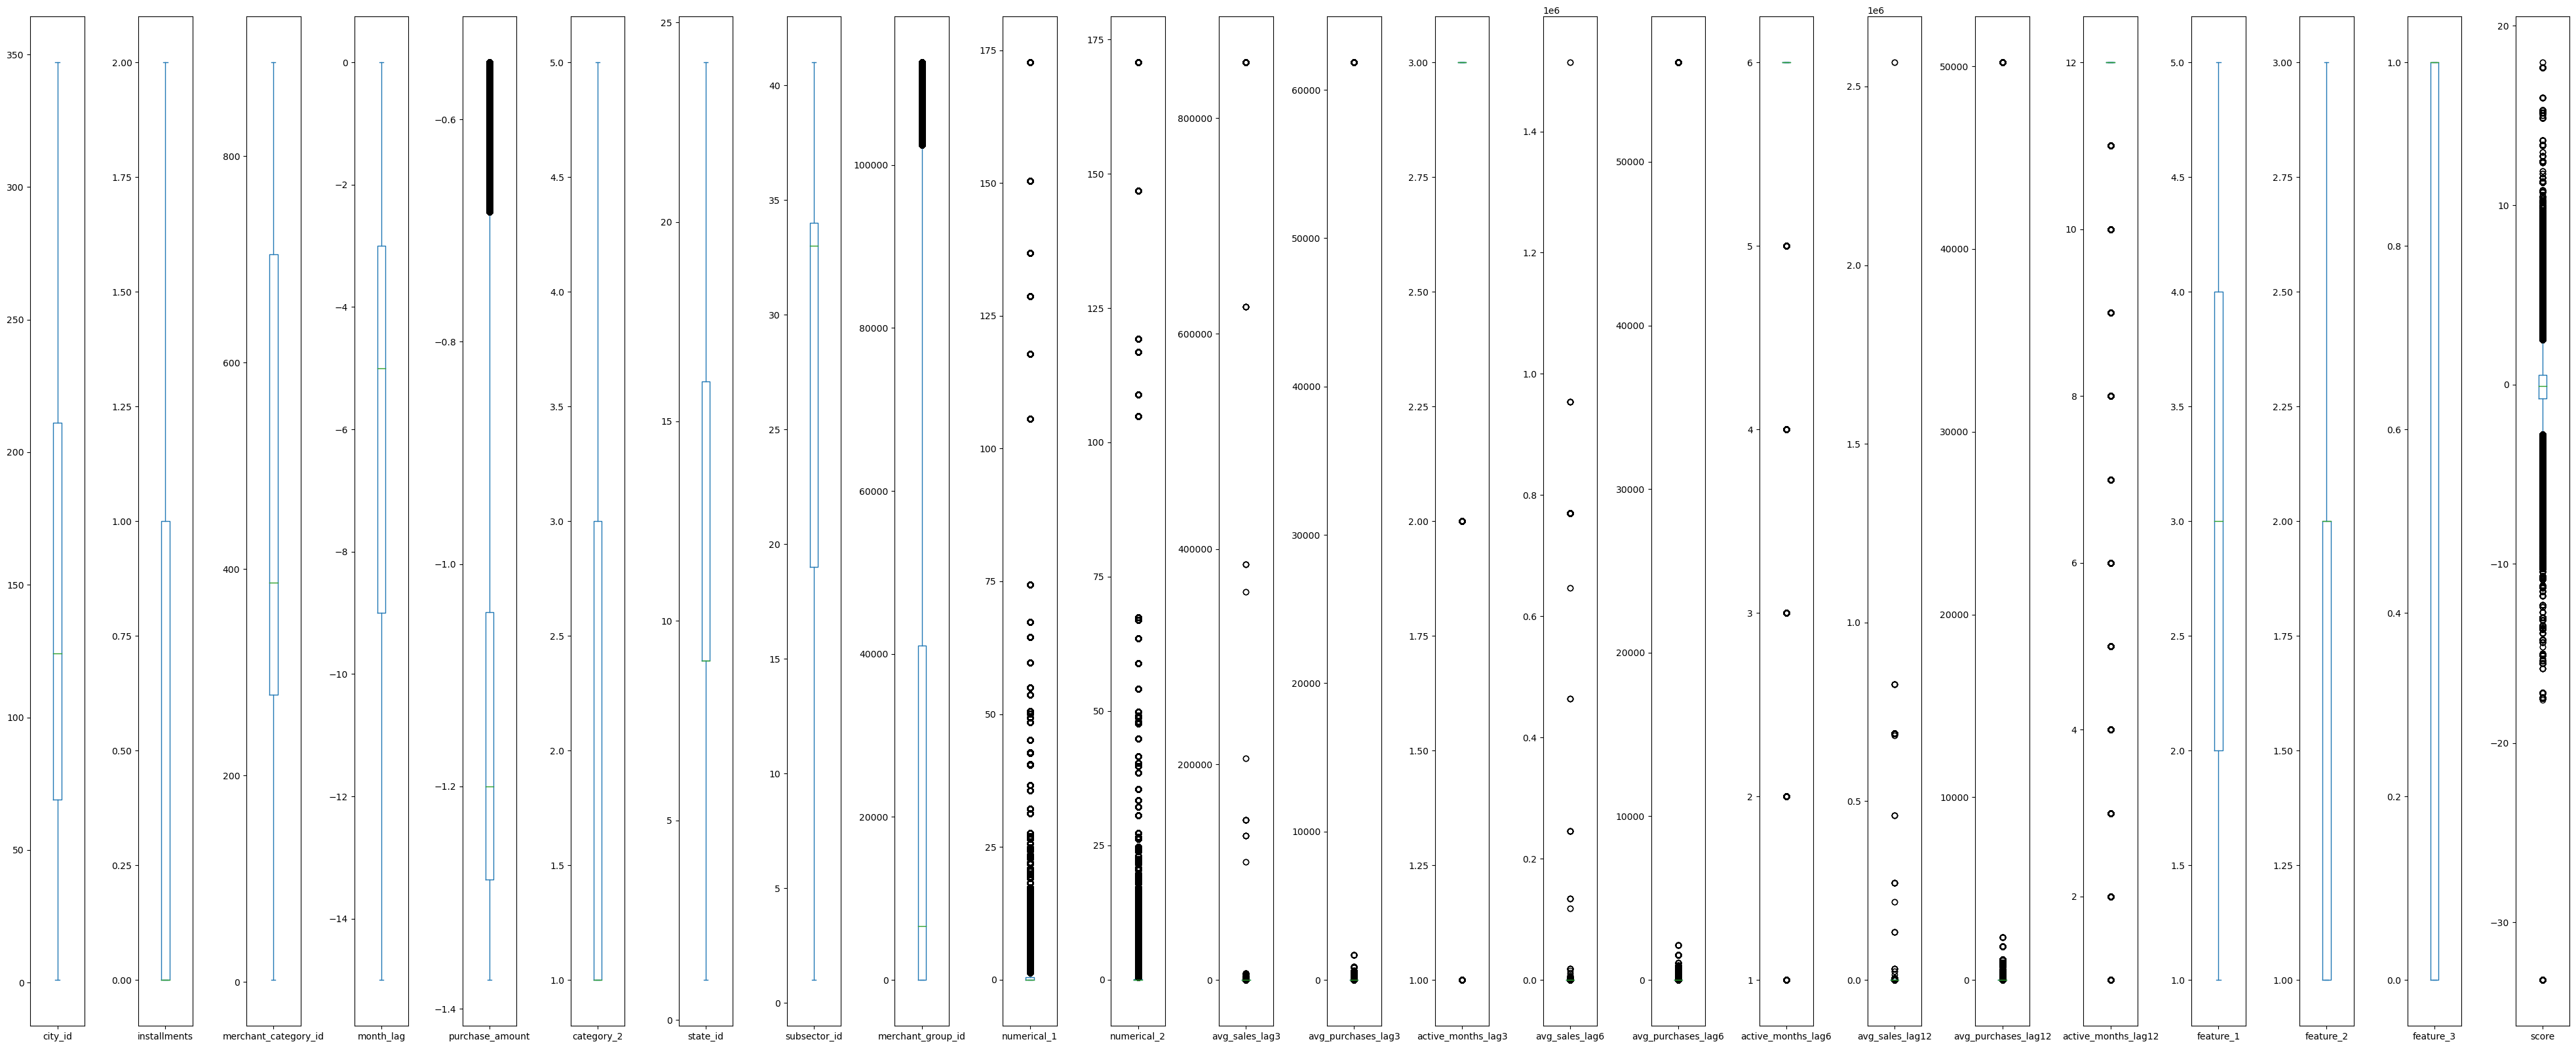

In [ ]:

explore_final_merged_data.visualize_outlier()


## Distribution of categorical data
--------------------------------

C    0.336724
D    0.251349
B    0.180117
A    0.159987
E    0.071823
Name: most_recent_sales_range, dtype: float64


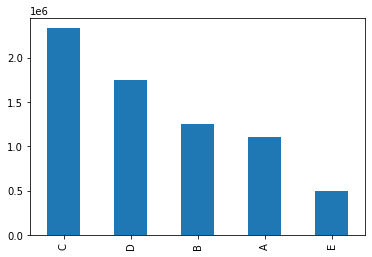


Y    0.505255
N    0.494745
Name: category_4, dtype: float64


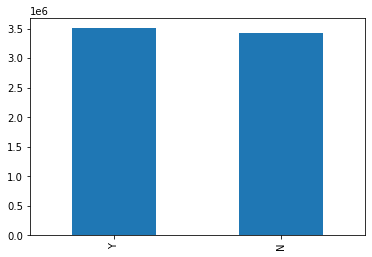


A    0.584916
B    0.398754
C    0.016330
Name: category_3, dtype: float64


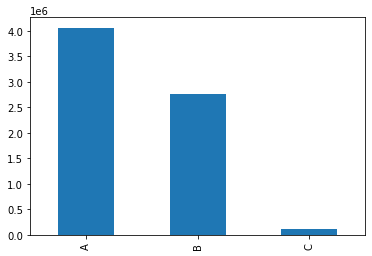


Y    0.94502
N    0.05498
Name: authorized_flag, dtype: float64


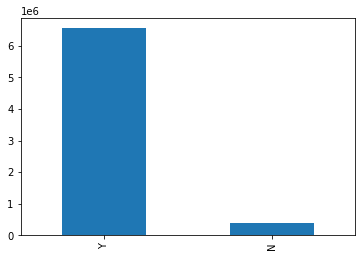


C    0.348838
B    0.226546
D    0.220500
A    0.173264
E    0.030851
Name: most_recent_purchases_range, dtype: float64


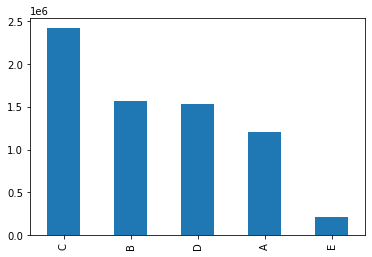

In [ ]:
col_excluded = []
explore.plot_object_features(col_excluded)

## Destribution of numerical data
----------------------

array([[<AxesSubplot:title={'center':'city_id'}>,
        <AxesSubplot:title={'center':'installments'}>,
        <AxesSubplot:title={'center':'merchant_category_id'}>,
        <AxesSubplot:title={'center':'month_lag'}>,
        <AxesSubplot:title={'center':'purchase_amount'}>],
       [<AxesSubplot:title={'center':'category_2'}>,
        <AxesSubplot:title={'center':'state_id'}>,
        <AxesSubplot:title={'center':'subsector_id'}>,
        <AxesSubplot:title={'center':'merchant_group_id'}>,
        <AxesSubplot:title={'center':'numerical_1'}>],
       [<AxesSubplot:title={'center':'numerical_2'}>,
        <AxesSubplot:title={'center':'avg_sales_lag3'}>,
        <AxesSubplot:title={'center':'avg_purchases_lag3'}>,
        <AxesSubplot:title={'center':'active_months_lag3'}>,
        <AxesSubplot:title={'center':'avg_sales_lag6'}>],
       [<AxesSubplot:title={'center':'avg_purchases_lag6'}>,
        <AxesSubplot:title={'center':'active_months_lag6'}>,
        <AxesSubplot:title={'cente

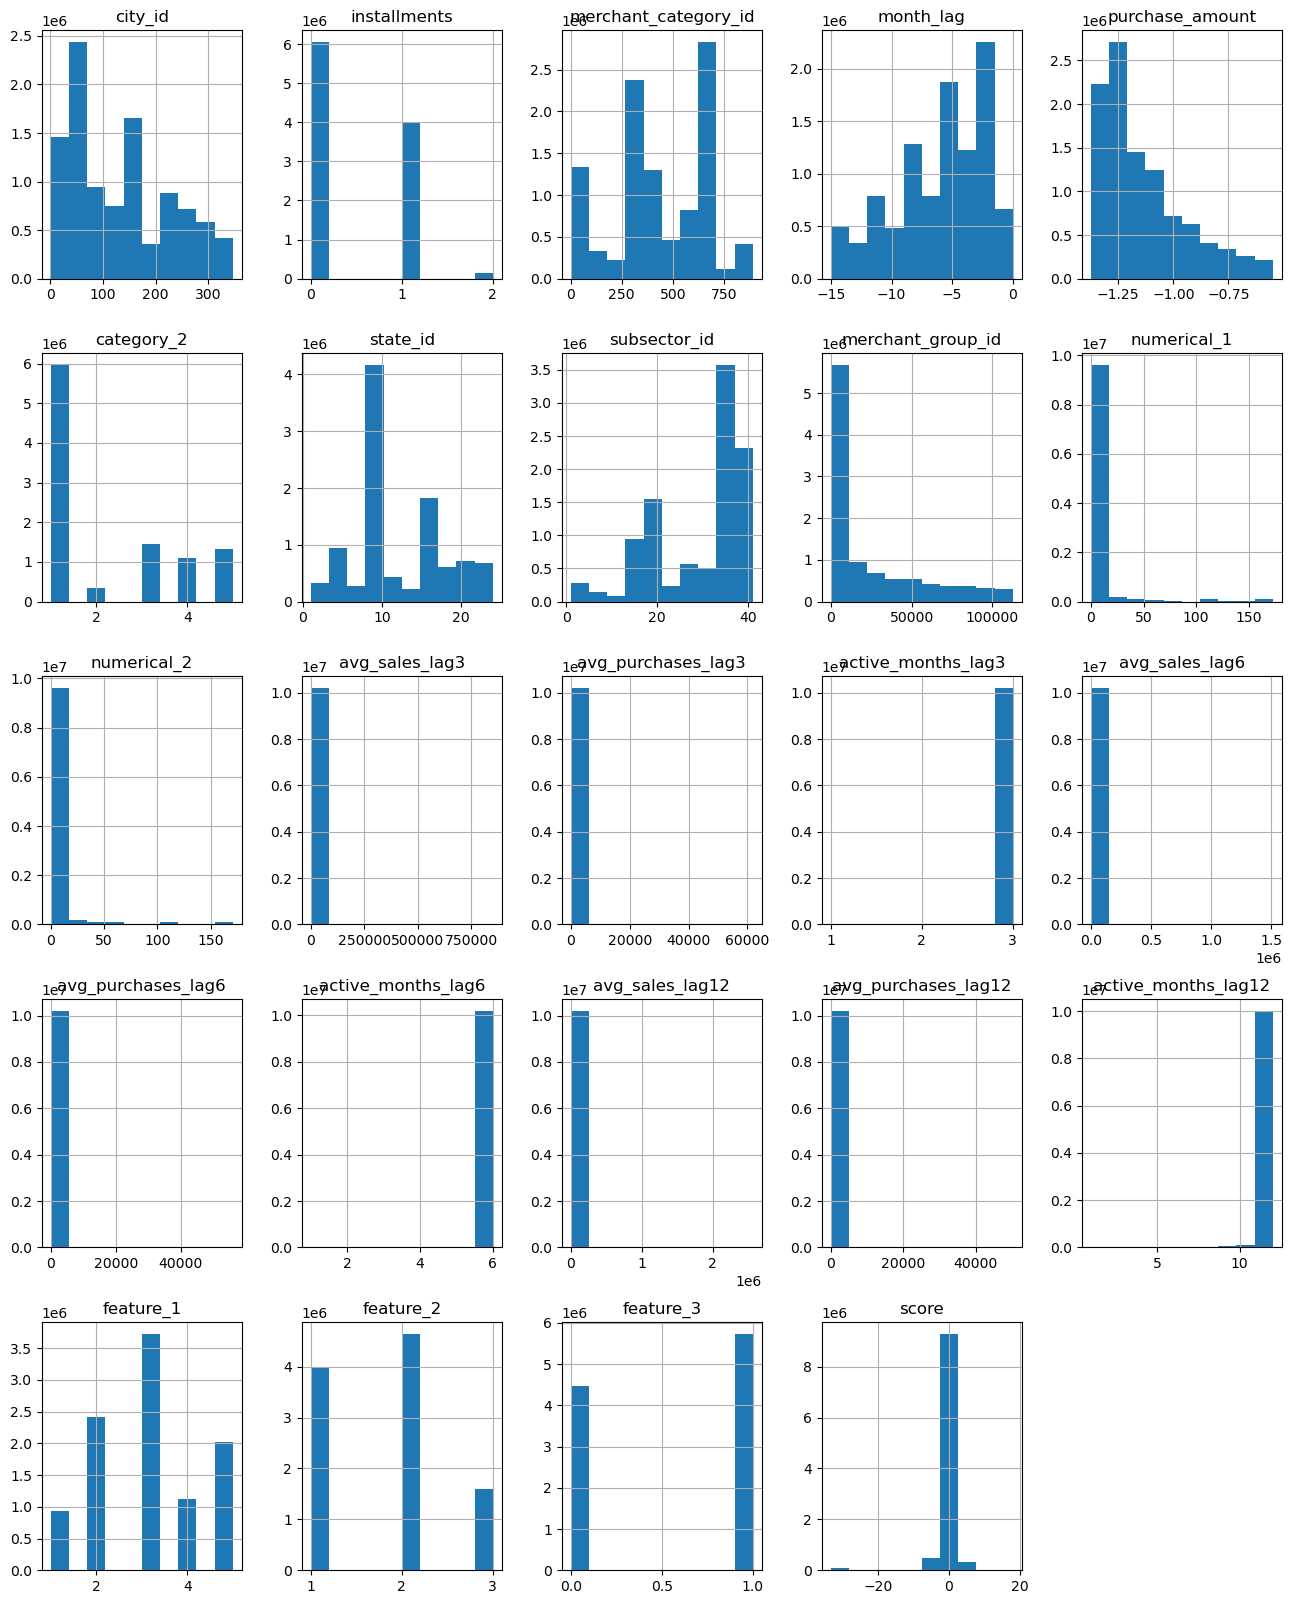

In [ ]:
final_merged_data.hist(figsize = (16,20))

## Detect Skewess Features
-----------------------

In [ ]:
explore_final_merged_data.detect_skewed_features()

skew
avg_sales_lag12       111.310883
avg_purchases_lag3    105.636463
avg_purchases_lag6    105.588500
avg_purchases_lag12   105.499543
avg_sales_lag6        105.251831
avg_sales_lag3        105.039940
numerical_2             5.956162
numerical_1             5.941144
merchant_group_id       1.252941
purchase_amount         1.129456
category_2              0.798708
installments            0.630321
city_id                 0.533816
state_id                0.399088
feature_2               0.356518
feature_1               0.183945
merchant_category_id   -0.039261
feature_3              -0.251377
month_lag              -0.548627
subsector_id           -0.980048
score                  -7.777187
active_months_lag12   -10.294708
active_months_lag6    -38.999467
active_months_lag3    -74.632309

## Check normality
------------------------

## Q4 (10 points) Report important statistics in preprocessed data created in Q3. The target user loyalty score must be covered in the statistical analysis.

- we performed some statistical techniques such as normality test in the next section 
  - H0 : The data follow normal distribution
  - H1 : The data  doesn't follow normal distribution
  - After applying , the test and visualize data. we can conclude that we will reject null hypothesis and know that the data doesn't follow normal distribution
- In the previous section, we calculated the correlation between score and all fetaures 

  - The most features that are correlated to score are :

    - month_lag ( negative correlated : -0.022784 )
    - installments (  negative correlated :  -0.027556)
    - category_2 (positive correlated  : 0.006164 )
    - city_id  (positive correlated  : 0.004117 )
    - merchant_category_id (positive correlated :   0.002121)


  - In the previous section, we performed outlier visualization on score and other columns . We noticed that there is some of points are far from data. we can assume that they are noise or not based on our knowledge of domain. we tried the both as I mentioned before.

p = 0
The null hypothesis can be rejected . The data doesn't follow normal distribution


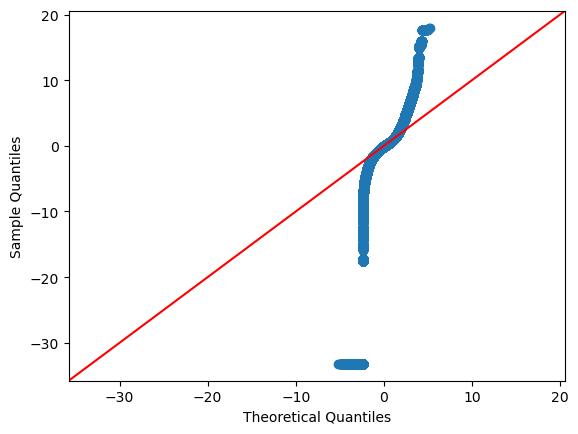

/home/jovyan/Data_Exploration.py:202: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(self.dataframe[col], fit=norm, ax=axes[0])


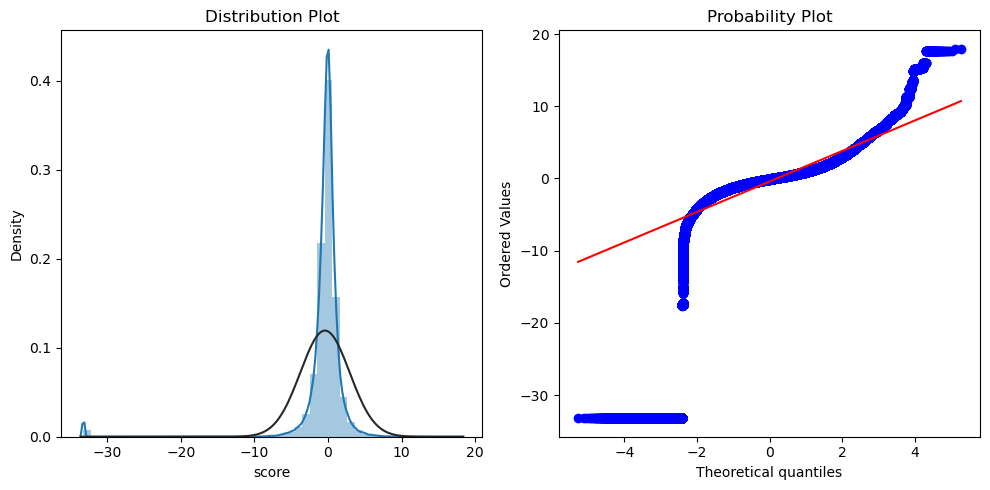

In [ ]:
explore_final_merged_data.normality_test('score')
explore_final_merged_data.normality_plot('score')

# Preprocessing 

## Q3 (10 points) Perform necessary data cleaning based on your answer to Q2.



- Drop the Inconsistency data in columns installments and purchase amount in the first notebook
-  Drop ['numerical_2', 'avg_purchases_lag3', 'avg_sales_lag6', 'avg_purchases_lag6', 'avg_sales_lag12', 'avg_purchases_lag12'] features as they are highly correlated with other features 
- Drop category_1 as it is a Constant feature 
- Drop null values 
- encode categrical features using label encoding


- Optionally, we will drop outlier in one of trails to see the performance

    


In [6]:
final_merged_data.drop(['numerical_2', 'avg_purchases_lag3', 'avg_sales_lag6', 'avg_purchases_lag6', 'avg_sales_lag12', 'avg_purchases_lag12' , 'category_1'], axis = 1 , inplace = True)

In [7]:
final_merged_data['first_active_month'] =pd.to_datetime(final_merged_data['first_active_month'] ,  format='%b-%y')
final_merged_data['first_active_month_month'] =final_merged_data['first_active_month'].dt.month
final_merged_data['first_active_month_year'] =final_merged_data['first_active_month'].dt.year
final_merged_data['purchase_date'] =pd.to_datetime(final_merged_data['purchase_date'] )
final_merged_data['purchase_month'] = final_merged_data['purchase_date'].dt.month
final_merged_data.loc[:, 'purchase_date'] = pd.DatetimeIndex(final_merged_data['purchase_date']).astype(np.int64) * 1e-9

In [8]:

final_merged_data['most_recent_purchases_range'] = final_merged_data['most_recent_purchases_range'].map({'A':5, 'B':4,'C':3 ,'D':2 ,'E':1})
final_merged_data['category_4'] = final_merged_data['category_4'].map({'Y':1, 'N':0})
final_merged_data['category_3'] = final_merged_data['category_3'].map({'A':1, 'B':2,'C':3})
final_merged_data['most_recent_sales_range'] = final_merged_data['most_recent_sales_range'].map({'A':5, 'B':4,'C':3 , 'D':2 , 'E':1})
final_merged_data['authorized_flag'] = final_merged_data['authorized_flag'].map({'Y':1, 'N':0})

In [9]:
final_merged_data.isna().sum()

authorized_flag                0
card_id                        0
city_id                        0
installments                   0
category_3                     0
merchant_category_id           0
merchant_id                    0
month_lag                      0
purchase_amount                0
purchase_date                  0
category_2                     0
state_id                       0
subsector_id                   0
merchant_group_id              0
numerical_1                    0
most_recent_sales_range        0
most_recent_purchases_range    0
avg_sales_lag3                 1
active_months_lag3             0
active_months_lag6             0
active_months_lag12            0
category_4                     0
first_active_month             0
feature_1                      0
feature_2                      0
feature_3                      0
score                          0
first_active_month_month       0
first_active_month_year        0
purchase_month                 0
dtype: int

In [9]:
final_merged_data.dropna(axis = 0 , inplace =True)

In [11]:
final_merged_data.isna().sum()

authorized_flag                0
card_id                        0
city_id                        0
installments                   0
category_3                     0
merchant_category_id           0
merchant_id                    0
month_lag                      0
purchase_amount                0
purchase_date                  0
category_2                     0
state_id                       0
subsector_id                   0
merchant_group_id              0
numerical_1                    0
most_recent_sales_range        0
most_recent_purchases_range    0
avg_sales_lag3                 0
active_months_lag3             0
active_months_lag6             0
active_months_lag12            0
category_4                     0
first_active_month             0
feature_1                      0
feature_2                      0
feature_3                      0
score                          0
first_active_month_month       0
first_active_month_year        0
purchase_month                 0
dtype: int

In [10]:
explore = Explore_Data(final_merged_data)
columns_outliers = ['numerical_1' ,'avg_sales_lag3','active_months_lag3','active_months_lag6','active_months_lag12','score']
upper_limit_numerical_1 ,lower_limit_numerical_1 = explore.detect_outlier(columns_outliers[0])
upper_limit_avg_sales_lag3 , lower_limit_avg_sales_lag3 = explore.detect_outlier(columns_outliers[1])
upper_limit_score ,lower_limit_score = explore.detect_outlier(columns_outliers[5])

Number of outliers in this feature is :  1883254
Number of outliers in this feature is :  800390
Number of outliers in this feature is :  840768


#  1st trail 
---------------
---------------
---------------

## Feature Engineering
----------
---------


## Q6 (10 points) Create a regression model for user loyalty score prediction based on the above analysis. You need to determine what features to use and which regression model to use.


- **features to use**
  -  As you can see in this trail, apply aggregation on some of columns that we see that it is important and effective in our prediction
      - authorized_flag: ['mean', 'sum'],
      - category_2: ['mean', 'sum'],
      - category_3: ['sum', 'mean'],
      - category_4: ['sum', 'mean'],
      - merchant_id: ['nunique'],
      - purchase_amount: ['sum', 'mean', 'max', 'min'],
      - installments: ['sum', 'mean', 'max', 'min'],
      - purchase_month: ['mean', 'max', 'min'],
      - purchase_date: [np.ptp, 'max', 'min'],
      - month_lag: ['min', 'max'],
      - merchant_category_id: ['nunique'],
      - state_id: ['nunique'],
      - subsector_id: ['nunique'],
      - city_id: ['nunique'],
      - feature_1 : ['min'] ,
      - feature_2 : ['min'], 
      - feature_3 : ['min'] ,
      - first_active_month_month : ['min'] ,
      - first_active_month_year : ['min'],
      - score : ['min']
  - we dropped the correlated features and diidn't select any feature related to merchant as we assumed that these features won't effect in loyalty score

  - We didn't select the following features as we thought that they belongs to merchant and not effect on loyalty score
    - "most_recent_sales_range" 
    - "most_recent_purchases_range" 
    - "avg_sales_lag3"
    - 'active_months_lag3'
    - "active_months_lag6" 
    - 'active_months_lag12' 

- **regression model to use** 
  - As we conclude from the previous analysis that the data isn't normally distributed. So, we cann't use linear regression model.
  - We tried another 2 different models lightgbm and gredientboosting models.
  - We didn't apply any scaling as in tree-based models the scale of the features does not matter. 
  - The lightgbm is the best. It achieved higher performance than gradintboosting.
  - building and creating model is below you can see it in section of build and train model .




In [11]:
model_class = Model(final_merged_data)

In [12]:
agg_func = {
        'authorized_flag': ['mean', 'sum'],
        'category_2': ['mean', 'sum'],
        'category_3': ['sum', 'mean'],
        'category_4': ['sum', 'mean'],
        'merchant_id': ['nunique'],
        'purchase_amount': ['sum', 'mean', 'max', 'min'],
        'installments': ['sum', 'mean', 'max', 'min'],
        'purchase_month': ['mean', 'max', 'min'],
        'purchase_date': [np.ptp, 'max', 'min'],
        'month_lag': ['min', 'max'],
        'merchant_category_id': ['nunique'],
        'state_id': ['nunique'],
        'subsector_id': ['nunique'],
        'city_id': ['nunique'],
        'feature_1' : ['min'] ,
        'feature_2' : ['min'], 
        'feature_3' : ['min'] ,
        'first_active_month_month' : ['min'] ,
        'first_active_month_year' : ['min'],
        'score' : ['min']
    }


In [13]:
agg_trans_1st = model_class.aggregation(agg_func)

##  Hypothesis test
-----------
----------


## Q5 (20 points) Propose two hypothesis tests exploring information related to user loyalty score. For each hypothesis test, you must describe the motivation (why this hypothesis is interesting and important to test), null hypothesis, and select a proper statistical test to report the test result.

Hypothesis Test 1:
  - We applied Pearson correlation hyposthis test between the authorized_flag_mean variable and the score variable, and tests for statistical significance using a p-value threshold of 0.05. 
  - Null hypothesis indicates there is no correlation between authorized_flag_mean variable and the score variable.
  - Testing the hypothesis of whether there is a correlation between authorized_flag_mean and loyalty score is interesting and important **because** 
    - it can provide insight into the relationship between transaction approval rates and customer loyalty. If there is a statistically significant correlation between these variables, it may suggest that customers who have a higher proportion of approved transactions are more loyal to the business. This information can be used to develop targeted marketing strategies and customer engagement programs to improve customer loyalty.
    - it can provide understanding the impact of transaction approval rates: By examining the relationship between transaction approval rates and loyalty score, businesses can gain insight into how the approval process impacts customer loyalty. This can inform strategies for improving the approval process and customer experience.
  - Testing shows that There is a correlation between authorized_flag_mean variable and the score variable
  -  [The code In the Next section](#hypo)

Hypothesis Test 2:
  - We applied the pearson correlation hyposthis test between  month_lag_max variable and the score variable, and tests for statistical significance using a p-value threshold of 0.05.
  -The month_lag_max variable represents the maximum value of the month lag variable for each customer, which indicates the number of months between a transaction and the reference date (the last day of data available)


  - Null hypothesis indicates there is no correlation between month_lag_max variable and the score variable.
  - Testing the hypothesis of whether there is a correlation between month_lag_max and loyalty score is interesting and important **because** 
    -  it can provide insight into the relationship between the recency of transactions and customer loyalty. If there is a statistically significant correlation between these variables, it may suggest that customers who have made more recent transactions are more loyal to the business. This information can be used to develop targeted marketing strategies and customer engagement programs to improve customer loyalty. For instance, businesses may provide personalized offers and promotions to customers who have recently transacted with the business to encourage a repeat purchase and improve their loyalty.
  - Testing shows that There is a correlation between month_lag_max variable and the score variable
    
  -  [The code In the Next section](#hypo)


Pearson correlation coefficient: -0.0053
P-value: 0.0259
Reject null hypothesis and There is a correlation between month_lag_max and loyalty score 


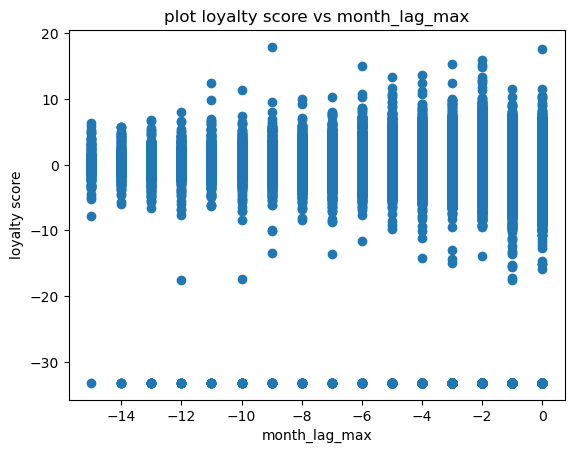

Pearson correlation coefficient: 0.0155
P-value: 0.0000
Reject null hypothesis and There is a correlation between authorized_flag and loyalty score 


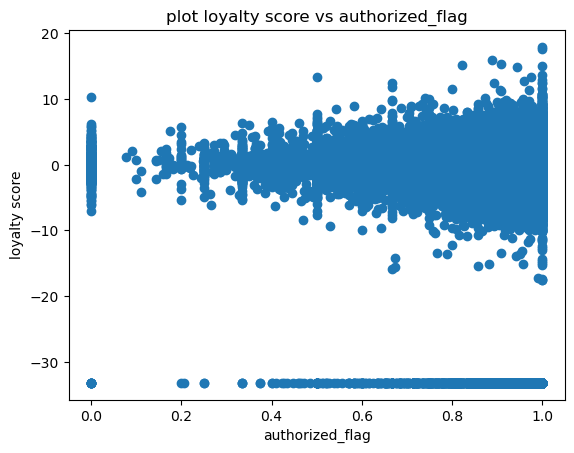

In [ ]:
explore_final_merged_data.Hyposthesis_test(agg_trans_1st['month_lag_max'],  agg_trans_1st['score_min'],'month_lag_max' )
explore_final_merged_data.Hyposthesis_test(agg_trans_1st['authorized_flag_mean'],  agg_trans_1st['score_min'],'authorized_flag' )

## Split data into train test with ratio ( 80 : 20) respectively
--------------------
------

In [14]:
X_train_1st , X_test_1st,  y_train_1st, y_test_1st = model_class.split_data(agg_trans_1st)

## Build and Train model
---------------
--------------

In [ ]:
model_1st = model_class.train_model('lgb' , X_train_1st , y_train_1st,X_test_1st,y_test_1st)

C:\Users\ad\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\ad\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1


In [ ]:
model_1st_grad = model_class.train_model('gradientboost' ,  X_train_1st , y_train_1st,X_test_1st,y_test_1st)

## Evaluate model 
-------------
-------------

## Q8 (10 points) Build one regression model and report the performance of your model on train and test.

- We buit 2 different models (gradientboosting and lightlgb)
- when we compared the performance of each model. we found that lightgbm is better than gradientboosting. There is no significant difference between both. But the r square in lightgbm is larger than gradientboosting


- The performance still need to improve. So, we do another trail with different combination of features
- The best trails are 1st and 3rd trail.
- these features aren't important 
      - "most_recent_sales_range" : ['mean', 'sum'],
      - "most_recent_purchases_range" : ['mean', 'sum'],
      - "avg_sales_lag3" :	['mean', 'sum'],
      - 'active_months_lag3': ['mean', 'max', 'min'],
      - "active_months_lag6" : ['mean', 'max', 'min'],
      - 'active_months_lag12' : ['mean', 'max', 'min'],
  As we see the performance goes worse when we used them in 2nd trail
  
  - The worst trail is 4thtrail when we removed outliers. So, it is better to keep outliers as they may be not outlier and these are true data 

In [15]:
model_1st = joblib.load('model_lgb_1st_.pkl')
model_1st_grad = joblib.load('model_grad_1st.pkl')

MAE in test data : 1.578271788372932
MAE in train data : 1.541100858233304
MSE in test data: 13.242046902683088
MSE in train data: 12.048170328695932
RMSE in test data: 3.6389623387283203
RMSE in train data: 3.4710474397069153
R square in test data: 0.048376764379209125
R square in train data: 1.0


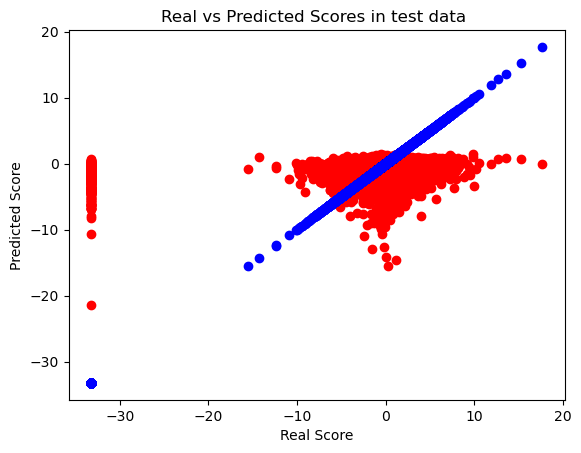

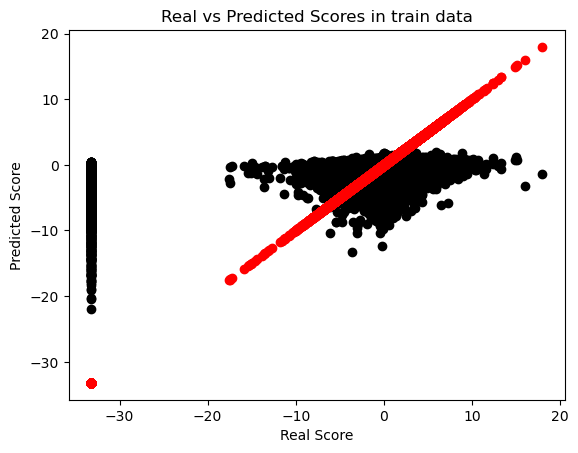

In [16]:
model_class.evaluation(model_1st , 'lgb' , X_train_1st , X_test_1st,  y_train_1st, y_test_1st  )

MAE in test data : 1.5623662056007301
MAE in train data : 1.5700514200315923
MSE in test data: 13.33663379974465
MSE in train data: 13.496866885250851
RMSE in test data: 3.651935623713081
RMSE in train data: 3.6738082265206566
R square in test data: 0.04157939463036642
R square in train data: 1.0


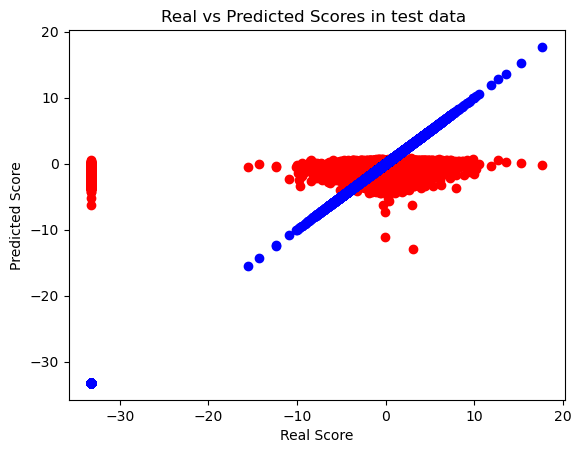

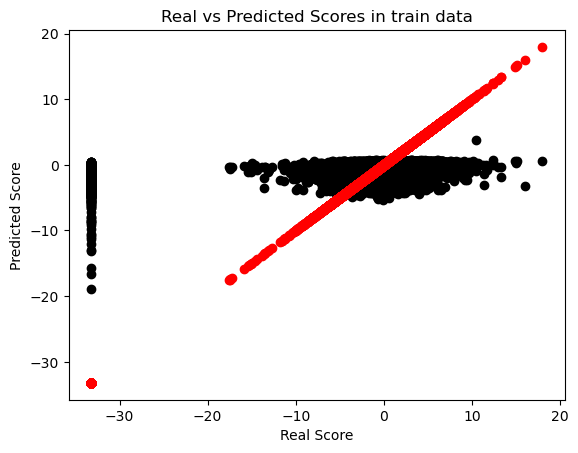

In [17]:
model_class.evaluation(model_1st_grad , 'grad' , X_train_1st , X_test_1st,  y_train_1st, y_test_1st  )

## Save model
-------
------------

In [ ]:
model_class.save_model( model_1st , "lgb_1st_")

In [ ]:
model_class.save_model( model_1st_grad , "grad_1st")

## Features Importance 
----
-------

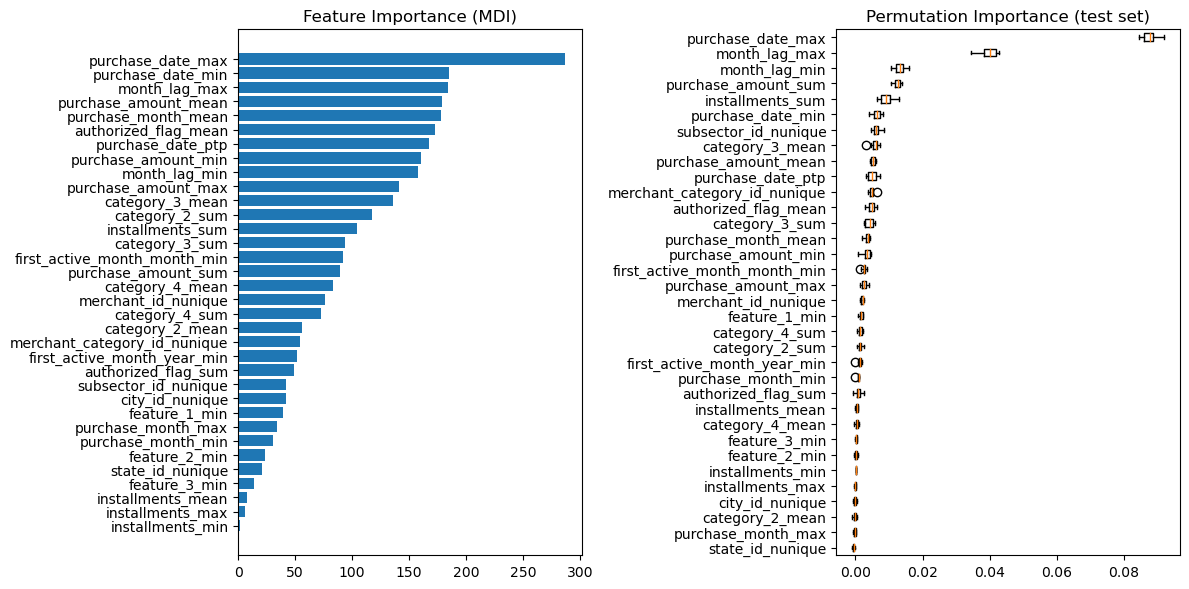

In [ ]:
model_class.feature_importance(model_1st, X_train_1st , X_test_1st,y_test_1st)

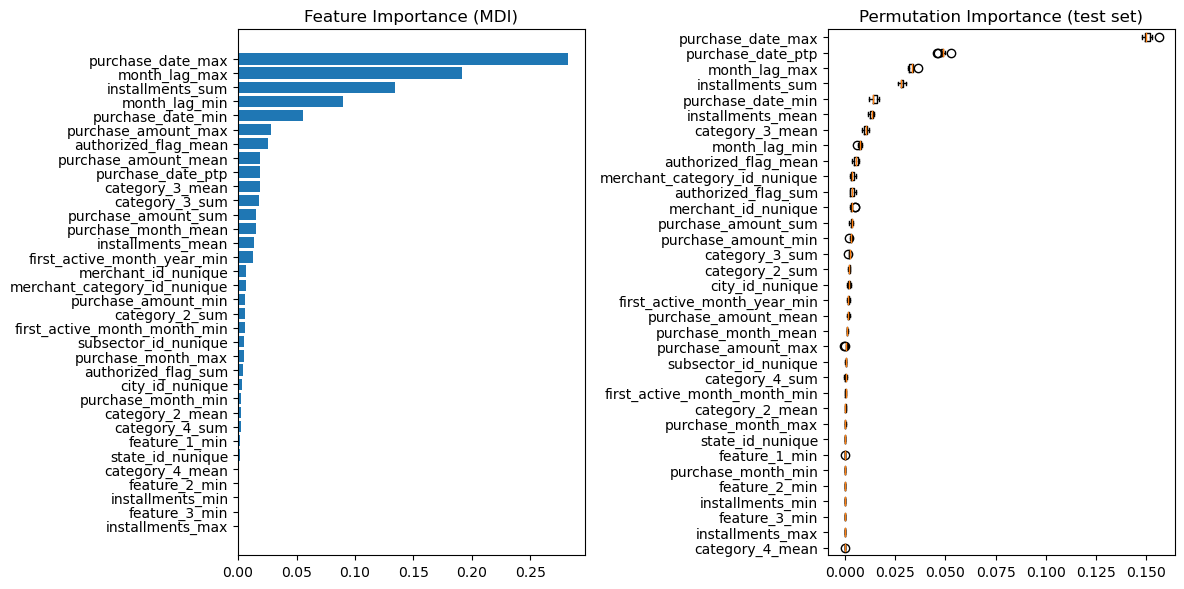

In [ ]:
model_class.feature_importance(model_1st_grad, X_train_1st , X_test_1st,y_test_1st)

# 2nd trail 
---------------
---------------
---------------

## Feature Engineering
----------
---------


## Q6 (10 points) Create a regression model for user loyalty score prediction based on the above analysis. You need to determine what features to use and which regression model to use.


- **features to use**
  -  As you can see in this trail, apply aggregation on some of columns that we see that it is important and effective in our prediction
  
      - "most_recent_sales_range" : ['mean', 'sum'],
      - "most_recent_purchases_range" : ['mean', 'sum'],
      - "avg_sales_lag3" :	['mean', 'sum'],
      - 'active_months_lag3': ['mean', 'max', 'min'],
      - "active_months_lag6" : ['mean', 'max', 'min'],
      - 'active_months_lag12' : ['mean', 'max', 'min'],
      - authorized_flag: ['mean', 'sum'],
      - category_2: ['mean', 'sum'],
      - category_3: ['sum', 'mean'],
      - category_4: ['sum', 'mean'],
      - merchant_id: ['nunique'],
      - purchase_amount: ['sum', 'mean', 'max', 'min'],
      - installments: ['sum', 'mean', 'max', 'min'],
      - purchase_month: ['mean', 'max', 'min'],
      - purchase_date: [np.ptp, 'max', 'min'],
      - month_lag: ['min', 'max'],
      - merchant_category_id: ['nunique'],
      - state_id: ['nunique'],
      - subsector_id: ['nunique'],
      - city_id: ['nunique'],
      - feature_1 : ['min'] ,
      - feature_2 : ['min'], 
      - feature_3 : ['min'] ,
      - first_active_month_month : ['min'] ,
      - first_active_month_year : ['min'],
      - score : ['min']
  - we dropped the correlated features and diidn't select any feature related to merchant as we assumed that these features won't effect in loyalty score

  - We select the previous excluded features to see if our model will be improved or not

      "most_recent_sales_range"
      "most_recent_purchases_range"
      "avg_sales_lag3"
      'active_months_lag3'
      "active_months_lag6"
      'active_months_lag12'

  - The r square go worse . So, these features effect badly to our model 

- **regression model to use** 
  - As we conclude from the previous analysis that the data isn't normally distributed. So, we cann't use linear regression model.
  - We tried another 2 different models lightgbm and gredientboosting models.
  - We didn't apply any scaling as in tree-based models the scale of the features does not matter. 
  - The lightgbm is the best. It achieved higher performance than gradintboosting.
  - building and creating model is below you can see it in section of build and train model .



In [18]:
agg_func_2nd = {
    
    "most_recent_sales_range" : ['mean', 'sum'],
    "most_recent_purchases_range" : ['mean', 'sum'],
    "avg_sales_lag3" :	['mean', 'sum'],
    'active_months_lag3': ['mean', 'max', 'min'],
    "active_months_lag6" : ['mean', 'max', 'min'],
    'active_months_lag12' : ['mean', 'max', 'min'],
    'authorized_flag': ['mean', 'sum'],
    'category_2': ['mean', 'sum'],
    'category_3': ['sum', 'mean'],
    'category_4': ['sum', 'mean'],
    'merchant_id': ['nunique'],
    'purchase_amount': ['sum', 'mean', 'max', 'min'],
    'installments': ['sum', 'mean', 'max', 'min'],
    'purchase_month': ['mean', 'max', 'min'],
    'purchase_date': [np.ptp, 'max', 'min'],
    'month_lag': ['min', 'max'],
    'merchant_category_id': ['nunique'],
    'state_id': ['nunique'],
    'subsector_id': ['nunique'],
    'city_id': ['nunique'],
    'feature_1' : ['min'] ,
    'feature_2' : ['min'], 
    'feature_3' : ['min'] ,
    'first_active_month_month' : ['min'] ,
    'first_active_month_year' : ['min'],
    'score' : ['min']
    }

In [19]:
agg_trans_2nd = model_class.aggregation(agg_func_2nd)

## Hypothesis test
-----------
----------

Pearson correlation coefficient: -0.0053
P-value: 0.0259
Reject null hypothesis and There is a correlation between month_lag_max and loyalty score 


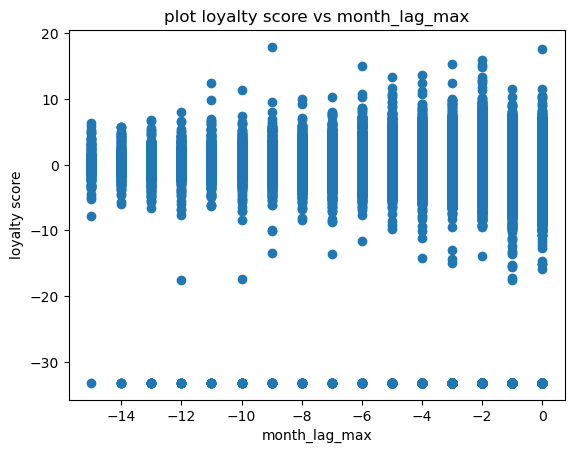

Pearson correlation coefficient: 0.0155
P-value: 0.0000
Reject null hypothesis and There is a correlation between authorized_flag and loyalty score 


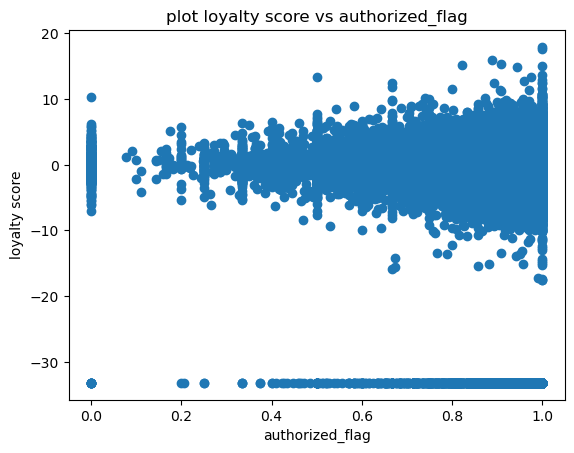

In [ ]:
explore_final_merged_data.Hyposthesis_test(agg_trans_2nd['month_lag_max'],  agg_trans_2nd['score_min'],'month_lag_max' )
explore_final_merged_data.Hyposthesis_test(agg_trans_2nd['authorized_flag_mean'],  agg_trans_2nd['score_min'],'authorized_flag' )

## Split data into train test with ratio ( 80 : 20) respectively
--------------------
------

In [20]:
X_train_2nd , X_test_2nd,  y_train_2nd , y_test_2nd = model_class.split_data(agg_trans_2nd)

## Build and Train model
---------------
--------------

In [ ]:
model_2nd = model_class.train_model('lgb' , X_train_2nd , y_train_2nd ,X_test_2nd,y_test_2nd)

C:\Users\ad\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\ad\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1


## Evaluate model 
-------------
-------------

In [21]:
model_2nd = joblib.load('model_lgb_2nd.pkl')

MAE in test data : 1.5725773837380526
MAE in train data : 1.5528923713119447
MSE in test data: 13.273568120722972
MSE in train data: 12.57459924092329
RMSE in test data: 3.6432908366918735
RMSE in train data: 3.5460681382234167
R square in test data: 0.046111531237968406
R square in train data: 1.0


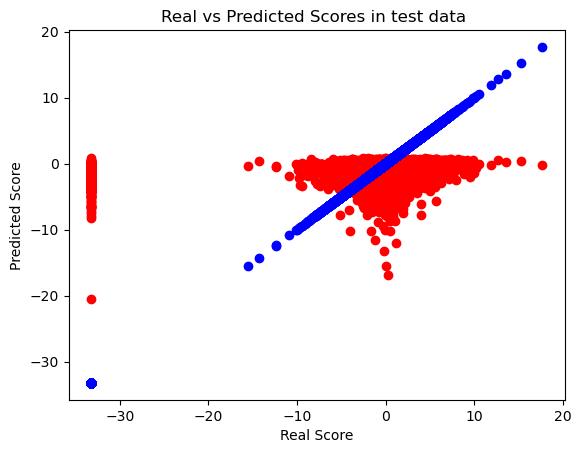

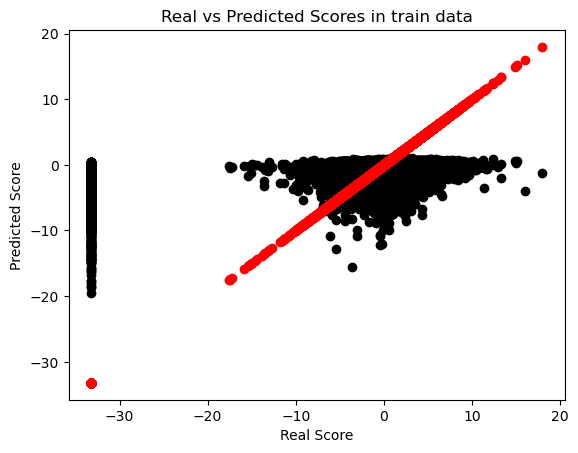

In [22]:
model_class.evaluation(model_2nd , 'lgb' , X_train_2nd , X_test_2nd,  y_train_2nd , y_test_2nd )

## Save model
-------
------------

In [ ]:
model_class.save_model( model_2nd , "lgb_2nd")

## Features Importance 
----
-------

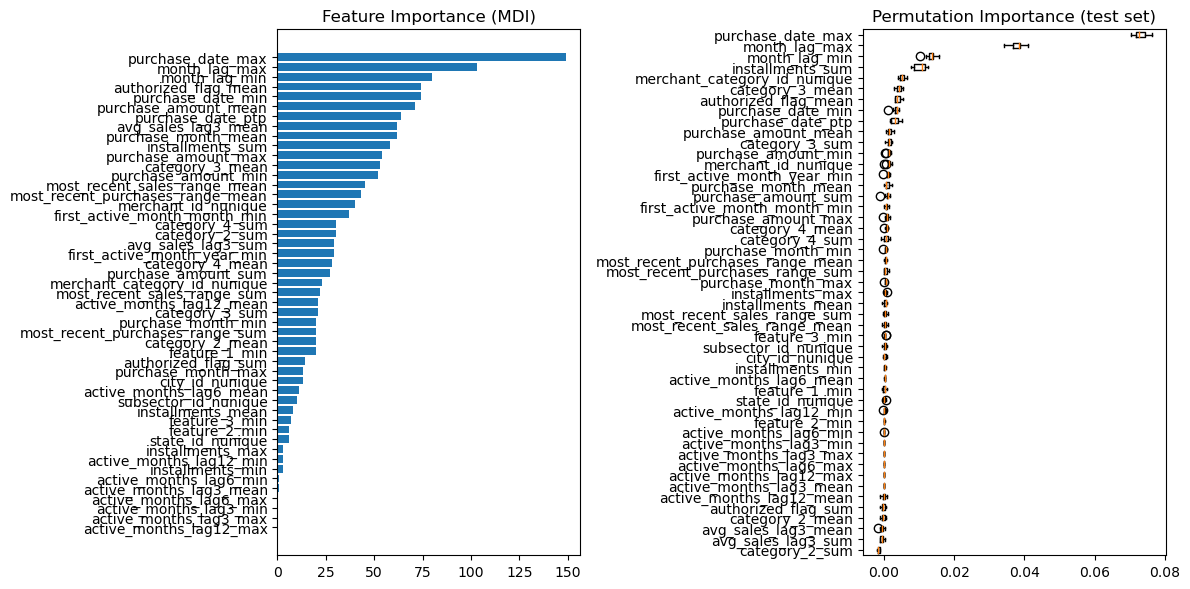

In [ ]:
model_class.feature_importance(model_2nd ,  X_train_2nd , X_test_2nd,y_test_2nd)

#  3rd trail 
---------------
---------------
---------------

## Feature Engineering
----------
---------


In [23]:
agg_func_3rd = {
        'authorized_flag': ['mean', 'sum'],
        'category_2': ['mean', 'sum'],
        'category_3': ['sum', 'mean'],
        'category_4': ['sum', 'mean'],
        'merchant_id': ['nunique'],
        'purchase_amount': ['sum', 'mean', 'max', 'min'],
        'installments': ['sum', 'mean', 'max', 'min'],
        'purchase_month': ['mean', 'max', 'min'],
        'purchase_date': [np.ptp, 'max', 'min'],
        'month_lag': ['min', 'max'],
        'merchant_category_id': ['nunique'],
        'state_id': ['nunique'],
        'subsector_id': ['nunique'],
        'city_id': ['nunique'],
        'feature_1' : ['min'] ,
        'feature_2' : ['min'], 
        'feature_3' : ['min'] ,
        'first_active_month_month' : ['min'] ,
        'first_active_month_year' : ['min'],
        'score' : ['min']
    }



In [24]:
agg_trans_3rd = model_class.aggregation(agg_func_3rd)

## Hypothesis test
-----------
----------

Pearson correlation coefficient: -0.0053
P-value: 0.0259
Reject null hypothesis and There is a correlation between month_lag_max and loyalty score 


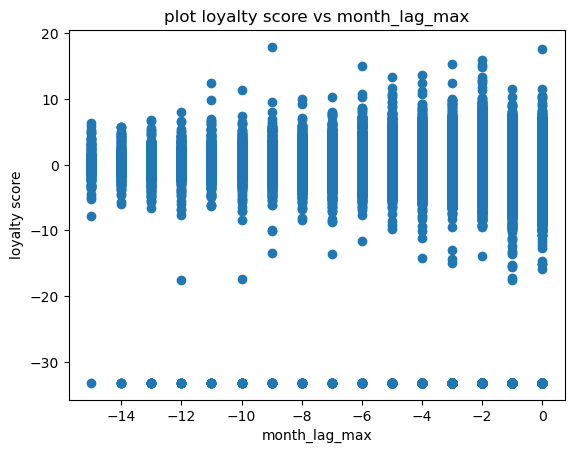

Pearson correlation coefficient: 0.0155
P-value: 0.0000
Reject null hypothesis and There is a correlation between authorized_flag and loyalty score 


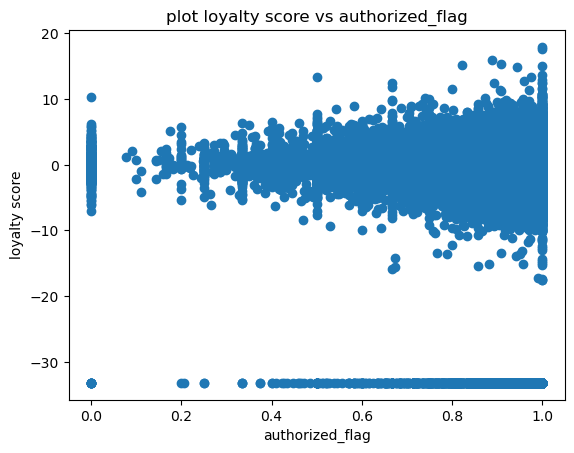

In [ ]:
explore_final_merged_data.Hyposthesis_test(agg_trans_3rd['month_lag_max'],  agg_trans_3rd['score_min'],'month_lag_max' )
explore_final_merged_data.Hyposthesis_test(agg_trans_3rd['authorized_flag_mean'],  agg_trans_3rd['score_min'],'authorized_flag' )

## Split data into train test with ratio ( 80 : 20) respectively
--------------------
------

In [25]:
X_train_3rd , X_test_3rd,  y_train_3rd, y_test_3rd = model_class.split_data(agg_trans_3rd)

## Build and Train model
---------------
--------------

In [ ]:
model_3rd = model_class.train_model('lgb' , X_train_3rd , y_train_3rd ,X_test_3rd,y_test_3rd)

## Evaluate model 
-------------
-------------

In [26]:
model_3rd = joblib.load('model_lgb_3rd.pkl')


MAE in test data : 1.578271788372932
MAE in train data : 1.541100858233304
MSE in test data: 13.242046902683088
MSE in train data: 12.048170328695932
RMSE in test data: 3.6389623387283203
RMSE in train data: 3.4710474397069153
R square in test data: 0.048376764379209125
R square in train data: 1.0


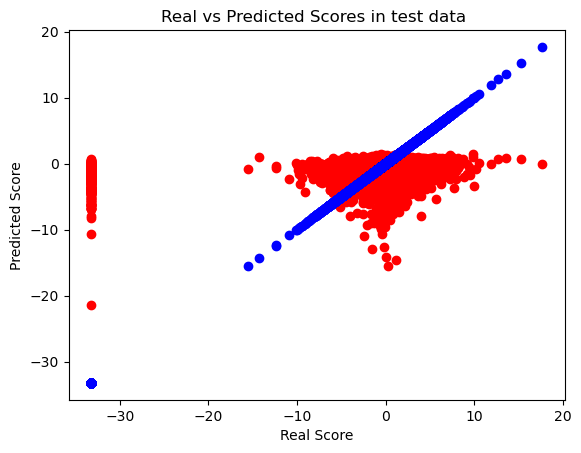

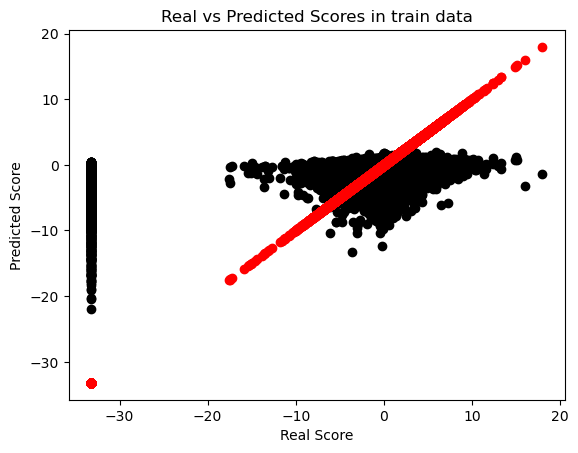

In [27]:
model_class.evaluation(model_3rd , 'lgb' , X_train_3rd , X_test_3rd,  y_train_3rd, y_test_3rd )

## Save model
-------
------------

In [ ]:
model_class.save_model( model_3rd , "lgb_3rd")

## Features Importance 
----
-------

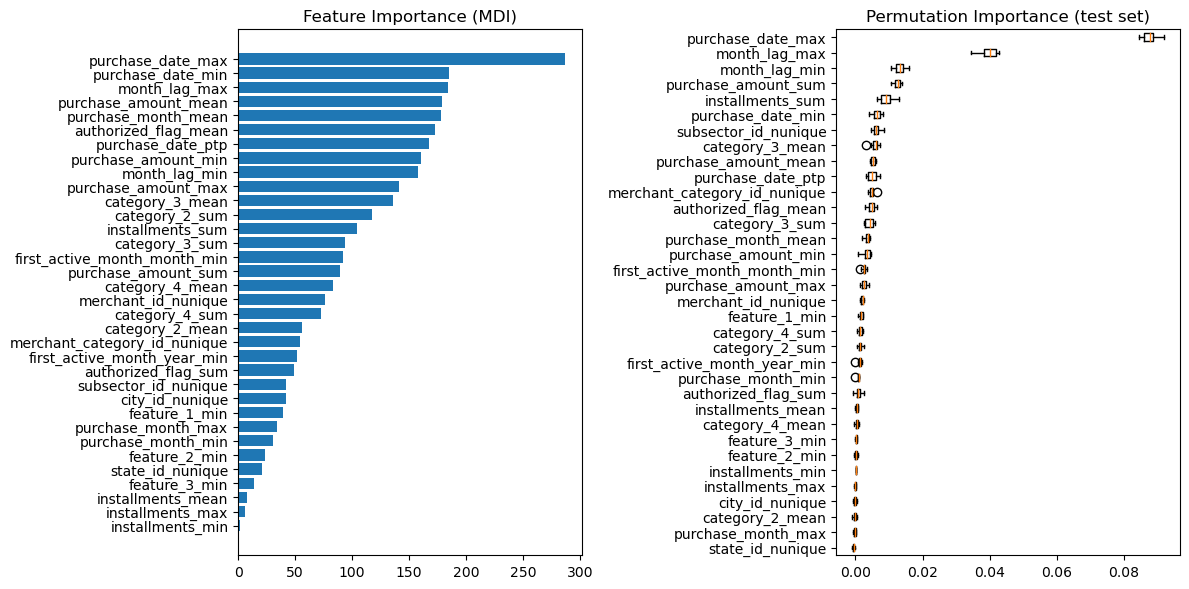

In [ ]:
model_class.feature_importance(model_3rd,X_train_3rd , X_test_3rd,y_test_3rd)

# 4th trail 
-----------
-------------

## Q6 (10 points) Create a regression model for user loyalty score prediction based on the above analysis. You need to determine what features to use and which regression model to use.


- **features to use**
  -  As you can see in this trail, apply aggregation on some of columns that we see that it is important and effective in our prediction
  
      - "most_recent_sales_range" : ['mean', 'sum'],
      - "most_recent_purchases_range" : ['mean', 'sum'],
      - "avg_sales_lag3" :	['mean', 'sum'],
      - 'active_months_lag3': ['mean', 'max', 'min'],
      - "active_months_lag6" : ['mean', 'max', 'min'],
      - 'active_months_lag12' : ['mean', 'max', 'min'],
      - authorized_flag: ['mean', 'sum'],
      - category_2: ['mean', 'sum'],
      - category_3: ['sum', 'mean'],
      - category_4: ['sum', 'mean'],
      - merchant_id: ['nunique'],
      - purchase_amount: ['sum', 'mean', 'max', 'min'],
      - installments: ['sum', 'mean', 'max', 'min'],
      - purchase_month: ['mean', 'max', 'min'],
      - purchase_date: [np.ptp, 'max', 'min'],
      - month_lag: ['min', 'max'],
      - merchant_category_id: ['nunique'],
      - state_id: ['nunique'],
      - subsector_id: ['nunique'],
      - city_id: ['nunique'],
      - feature_1 : ['min'] ,
      - feature_2 : ['min'], 
      - feature_3 : ['min'] ,
      - first_active_month_month : ['min'] ,
      - first_active_month_year : ['min'],
      - score : ['min']
  - we dropped the correlated features and diidn't select any feature related to merchant as we assumed that these features won't effect in loyalty score

  - We select the previous excluded features to see if our model will be improved or not

      "most_recent_sales_range"
      "most_recent_purchases_range"
      "avg_sales_lag3"
      'active_months_lag3'
      "active_months_lag6"
      'active_months_lag12'

  - we removed outliers to see the performance.
  - We noticed that the model go worse the r square is significantly decreased

- **regression model to use** 
  - As we conclude from the previous analysis that the data isn't normally distributed. So, we cann't use linear regression model.
  - We tried another 2 different models lightgbm and gredientboosting models.
  - We didn't apply any scaling as in tree-based models the scale of the features does not matter. 
  - The lightgbm is the best. It achieved higher performance than gradintboosting.
  - building and creating model is below you can see it in section of build and train model .



In [28]:
rows_index_to_drop = list(set(upper_limit_numerical_1) | set(upper_limit_avg_sales_lag3) |set(upper_limit_score) |set(lower_limit_numerical_1) | set(lower_limit_avg_sales_lag3) | set(lower_limit_score))
print("Total number of outliers " , len(rows_index_to_drop))

Total number of outliers  3264917


In [29]:
final_merged_data.reset_index(inplace=True)
final_merged_data.drop(index=rows_index_to_drop, inplace=True)
print("Shape of data after dropping outliers" , final_merged_data.shape)

Shape of data after dropping outliers (6939674, 31)


In [30]:
model_class_outliers = Model(final_merged_data)

In [31]:
agg_trans_4th = model_class_outliers.aggregation(agg_func_2nd)

## Hypothesis test
-----------
----------

Pearson correlation coefficient: -0.0658
P-value: 0.0000
Reject null hypothesis and There is a correlation between month_lag_max and loyalty score 


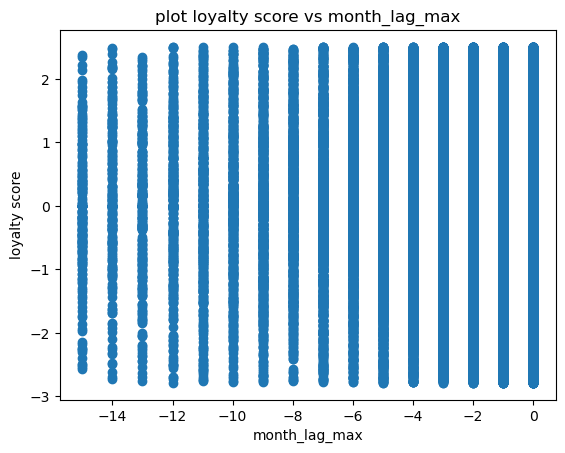

Pearson correlation coefficient: -0.0173
P-value: 0.0000
Reject null hypothesis and There is a correlation between authorized_flag and loyalty score 


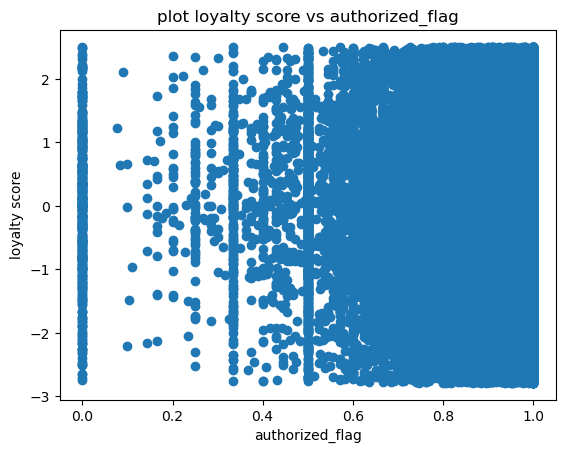

In [ ]:
explore_final_merged_data.Hyposthesis_test(agg_trans_4th['month_lag_max'],  agg_trans_4th['score_min'],'month_lag_max' )
explore_final_merged_data.Hyposthesis_test(agg_trans_4th['authorized_flag_mean'],  agg_trans_4th['score_min'],'authorized_flag' )

## Split data into train test with ratio ( 80 : 20) respectively
--------------------
------

In [32]:
X_train_4th , X_test_4th,  y_train_4th, y_test_4th = model_class_outliers.split_data(agg_trans_4th)

## Build and Train model
---------------
--------------

In [ ]:
model_4th = model_class_outliers.train_model('lgb' , X_train_4th , y_train_4th , X_test_4th, y_test_4th)

C:\Users\ad\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\ad\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1


## Evaluate model 
-------------
-------------

In [33]:
model_4th = joblib.load('model_lgb_4th.pkl')


MAE in test data : 0.8373002208425706
MAE in train data : 0.8330594810012784
MSE in test data: 1.1267680897136878
MSE in train data: 1.1162664934782094
RMSE in test data: 1.0614933300373055
RMSE in train data: 1.0565351359411619
R square in test data: 0.02132917605104112
R square in train data: 1.0


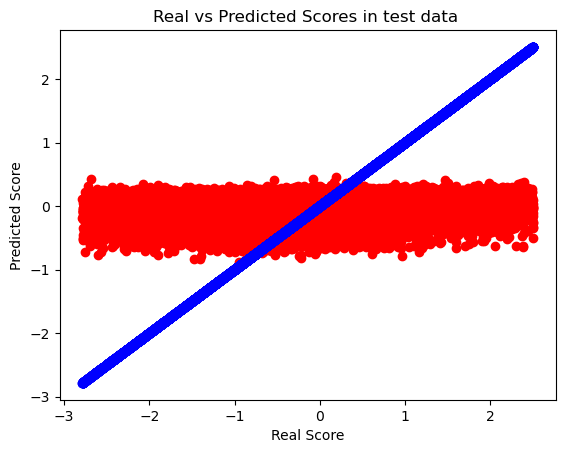

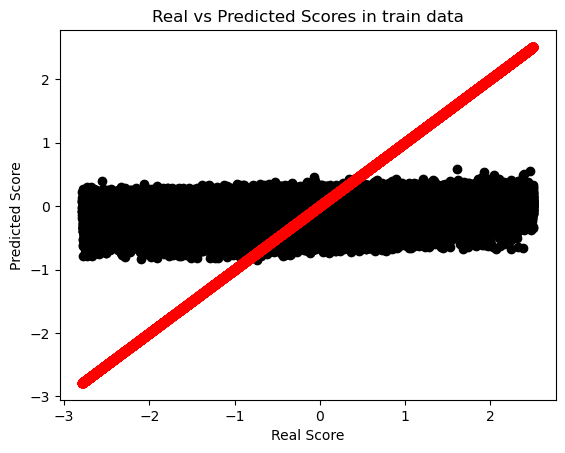

In [34]:
model_class_outliers.evaluation(model_4th , 'lgb' , X_train_4th , X_test_4th,  y_train_4th, y_test_4th )

## Save model
-------
------------

In [ ]:
model_class_outliers.save_model( model_4th , "lgb_4th")

## Features Importance 
----
-------

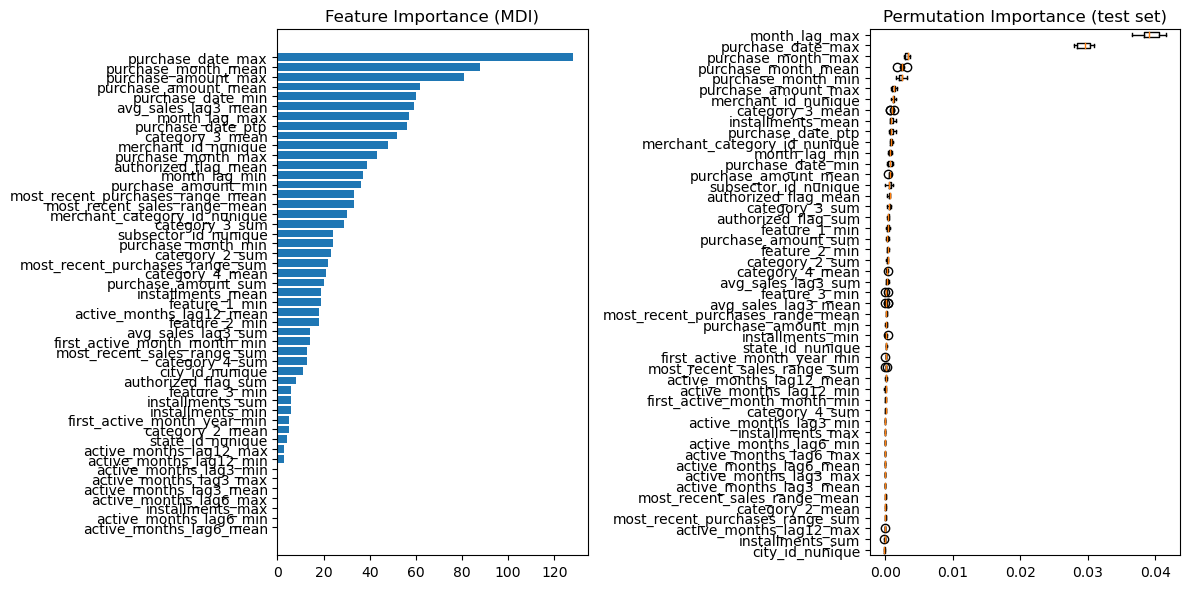

In [ ]:
model_class_outliers.feature_importance(model_4th,X_train_4th , X_test_4th,y_test_4th)

# Save the final prerocessed data that achieved high performance

In [ ]:
agg_trans_1st.to_csv("preprocessed_Data.csv" , index =False)